In [5]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

### Adiquirindo os Dados

In [6]:
df = pd.read_csv('E:/ML_RS/Qgis/Passo_feio/df_pf_gam_mdt_lsat.csv',
                       header=0, 
                        usecols='fid,lon,lat,TC,Kperc,eU,eTh,U_Th,U_K,Th_K,MDT,COD_UNI_ES,SIGLA_UNID,LS9_B6_SWIR,LS9_B5_NIR,LS9_B4_Red,LS9_B3_Green,LS9_B2_Blue,LS9_B7_SWIR2,LS9_RGB_Falsacor_1,LS9_RGB_Falsacor_2,LS9_RGB_Falsacor_3'.split(','),
                       low_memory=False)

In [7]:
column_names = "fid lon lat TC Kperc eU eTh U_Th U_K Th_K MDT COD_UNI_ES SIGLA_UNID LS9_B6_SWIR LS9_B5_NIR LS9_B4_Red LS9_B3_Green LS9_B2_Blue LS9_B7_SWIR2 LS9_RGB_Falsacor_1 LS9_RGB_Falsacor_2 LS9_RGB_Falsacor_3".split(' ')
column_names


['fid',
 'lon',
 'lat',
 'TC',
 'Kperc',
 'eU',
 'eTh',
 'U_Th',
 'U_K',
 'Th_K',
 'MDT',
 'COD_UNI_ES',
 'SIGLA_UNID',
 'LS9_B6_SWIR',
 'LS9_B5_NIR',
 'LS9_B4_Red',
 'LS9_B3_Green',
 'LS9_B2_Blue',
 'LS9_B7_SWIR2',
 'LS9_RGB_Falsacor_1',
 'LS9_RGB_Falsacor_2',
 'LS9_RGB_Falsacor_3']

### Visualização dos Dados

In [8]:
df.describe()

,fid,lon,lat,TC,Kperc,eU,eTh,U_Th,U_K,Th_K,...,COD_UNI_ES,LS9_B6_SWIR,LS9_B5_NIR,LS9_B4_Red,LS9_B3_Green,LS9_B2_Blue,LS9_B7_SWIR2,LS9_RGB_Falsacor_1,LS9_RGB_Falsacor_2,LS9_RGB_Falsacor_3
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,...,6237.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6455.000000,6455.000000,6455.000000
mean,3240.500000,-53.564996,-30.635005,0.500039,0.494855,0.501498,0.489132,5.329372,7.485620,12.198262,...,2217.307520,10252.115625,17495.964017,8599.580681,8984.144091,8111.893171,10252.115625,63.807591,87.724555,39.584198
std,1870.759204,0.037876,0.079246,0.289611,0.288567,0.286502,0.288364,98.575916,150.306415,589.482663,...,1591.257019,1219.420879,2733.728247,595.341097,599.665233,310.157696,1219.420879,15.944361,19.107456,9.962013
min,1.000000,-53.629990,-30.769983,0.000044,0.000004,0.000505,0.000029,0.000717,0.000718,0.000067,...,135.000000,7397.000000,7687.000000,7315.000000,7477.000000,7334.000000,7397.000000,0.000000,0.000000,0.000000
25%,1620.750000,-53.597493,-30.702494,0.248856,0.244507,0.255996,0.237625,0.510615,0.517667,0.493398,...,152.000000,9328.000000,15758.000000,8148.000000,8513.000000,7885.000000,9328.000000,58.500000,84.000000,36.000000
50%,3240.500000,-53.564996,-30.635005,0.499756,0.492584,0.506608,0.476460,1.027505,1.010362,0.995360,...,2711.000000,10181.000000,17556.000000,8525.000000,8949.000000,8096.000000,10181.000000,66.000000,91.000000,41.000000
75%,4860.250000,-53.532499,-30.567516,0.750780,0.744987,0.746949,0.738907,2.101909,2.038083,1.985643,...,3661.000000,11062.000000,19270.000000,8970.000000,9421.000000,8308.000000,11062.000000,74.000000,98.000000,45.000000
max,6480.000000,-53.500002,-30.500027,0.999761,0.999953,0.999603,0.999844,7550.956899,9793.230459,47292.650373,...,7252.000000,15615.000000,27315.000000,12372.000000,11667.000000,10137.000000,15615.000000,98.000000,125.000000,65.000000


### Organização e visualização dos dados

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fid                 6480 non-null   int64  
 1   lon                 6480 non-null   float64
 2   lat                 6480 non-null   float64
 3   TC                  6480 non-null   float64
 4   Kperc               6480 non-null   float64
 5   eU                  6480 non-null   float64
 6   eTh                 6480 non-null   float64
 7   U_Th                6480 non-null   float64
 8   U_K                 6480 non-null   float64
 9   Th_K                6480 non-null   float64
 10  MDT                 6195 non-null   float64
 11  COD_UNI_ES          6237 non-null   float64
 12  SIGLA_UNID          6237 non-null   object 
 13  LS9_B6_SWIR         6253 non-null   float64
 14  LS9_B5_NIR          6253 non-null   float64
 15  LS9_B4_Red          6253 non-null   float64
 16  LS9_B3

### Limpando os dados

In [ ]:
# 1. Separar colunas por tipo e significado
geo_cols = ['lon', 'lat', 'MDT']  # Dados geográficos/geomorfologia
radiometric_cols = ['TC', 'Kperc', 'eU', 'eTh', 'U_Th', 'U_K', 'Th_K']  # Radiometria
spectral_cols = [c for c in df.columns if 'LS9_' in c]  # Bandas Landsat
categorical_cols = ['SIGLA_UNID']  # Unidades geológicas
id_cols = ['fid', 'COD_UNI_ES']  # Identificadores

# 2. Tratamento para dados categóricos (SIGLA_UNID)
# Verificar distribuição antes
print("Distribuição original de SIGLA_UNID:\n", df['SIGLA_UNID'].value_counts())

# Preencher NAs com categoria especial (evitando vazamento de dados)
df['SIGLA_UNID'].fillna('UNKNOWN', inplace=True)

# 3. Tratamento diferenciado para grupos de variáveis numéricas

# A. Dados Geoespaciais (interpolação espacial)
from scipy.interpolate import Rbf
for col in geo_cols:
    if df[col].isna().any():
        # Criação de superfície de interpolação
        rbf = Rbf(df['lon'], df['lat'], df[col], function='linear')
        df[col] = rbf(df['lon'], df['lat'])

# B. Dados Radiométricos (imputação robusta)
from sklearn.impute import KNNImputer
radiometric_data = df[radiometric_cols]
imputer = KNNImputer(n_neighbors=5, weights='distance')
df[radiometric_cols] = imputer.fit_transform(radiometric_data)

# C. Bandas Espectrais (normalização + interpolação temporal se aplicável)
# Primeiro normalizar
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[spectral_cols] = scaler.fit_transform(df[spectral_cols])

# Depois preencher eventuais NAs restantes
df[spectral_cols] = df[spectral_cols].interpolate(method='linear', limit_direction='both')

# 4. Verificação final
print("\nValores faltantes após tratamento:")
print(df.isna().sum())

# 5. Engenharia de features geoespaciais (opcional mas recomendado)
# Calcular NDVI
df['NDVI'] = (df['LS9_B5_NIR'] - df['LS9_B4_Red']) / (df['LS9_B5_NIR'] + df['LS9_B4_Red'] + 1e-10)

# Calcular razões entre bandas (melhora a interpretabilidade)
df['Ratio_B5_B4'] = df['LS9_B5_NIR'] / (df['LS9_B4_Red'] + 1e-10)  # Evitar divisão por zero
df['Ratio_B7_B6'] = df['LS9_B7_SWIR2'] / (df['LS9_B6_SWIR'] + 1e-10)




Distribuição original de SIGLA_UNID:
 SIGLA_UNID
NP12vpf             1277
NP3sl                851
NP3sf                663
NP3an                658
NP3_gamma_ca         646
MP1_beta_am          639
NP3ps                508
NP3_beta_he          431
NP3C_cortado_1vz     323
NP3_alfa_avp         132
NP12vpfc              87
NP12vpfm              22
Name: count, dtype: int64

Valores faltantes após tratamento:
fid                   0
lon                   0
lat                   0
TC                    0
Kperc                 0
eU                    0
eTh                   0
U_Th                  0
U_K                   0
Th_K                  0
MDT                   0
COD_UNI_ES            0
SIGLA_UNID            0
LS9_B6_SWIR           0
LS9_B5_NIR            0
LS9_B4_Red            0
LS9_B3_Green          0
LS9_B2_Blue           0
LS9_B7_SWIR2          0
LS9_RGB_Falsacor_1    0
LS9_RGB_Falsacor_2    0
LS9_RGB_Falsacor_3    0
dtype: int64


C:\Users\Matias\AppData\Local\Temp\ipykernel_18200\517384008.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SIGLA_UNID'].fillna('UNKNOWN', inplace=True)


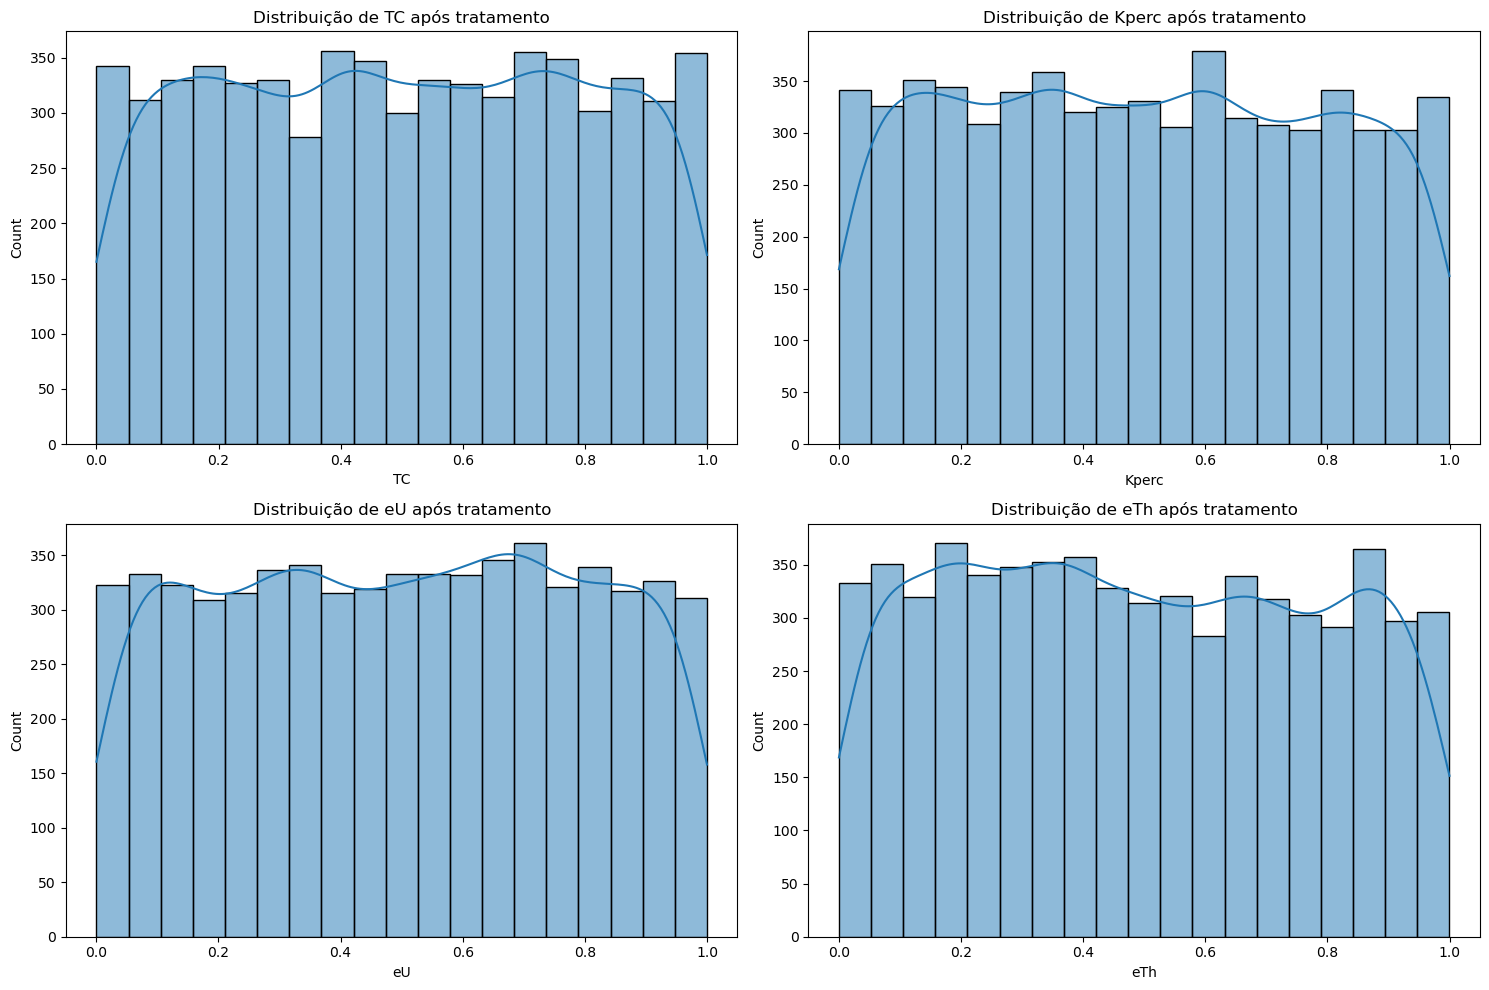

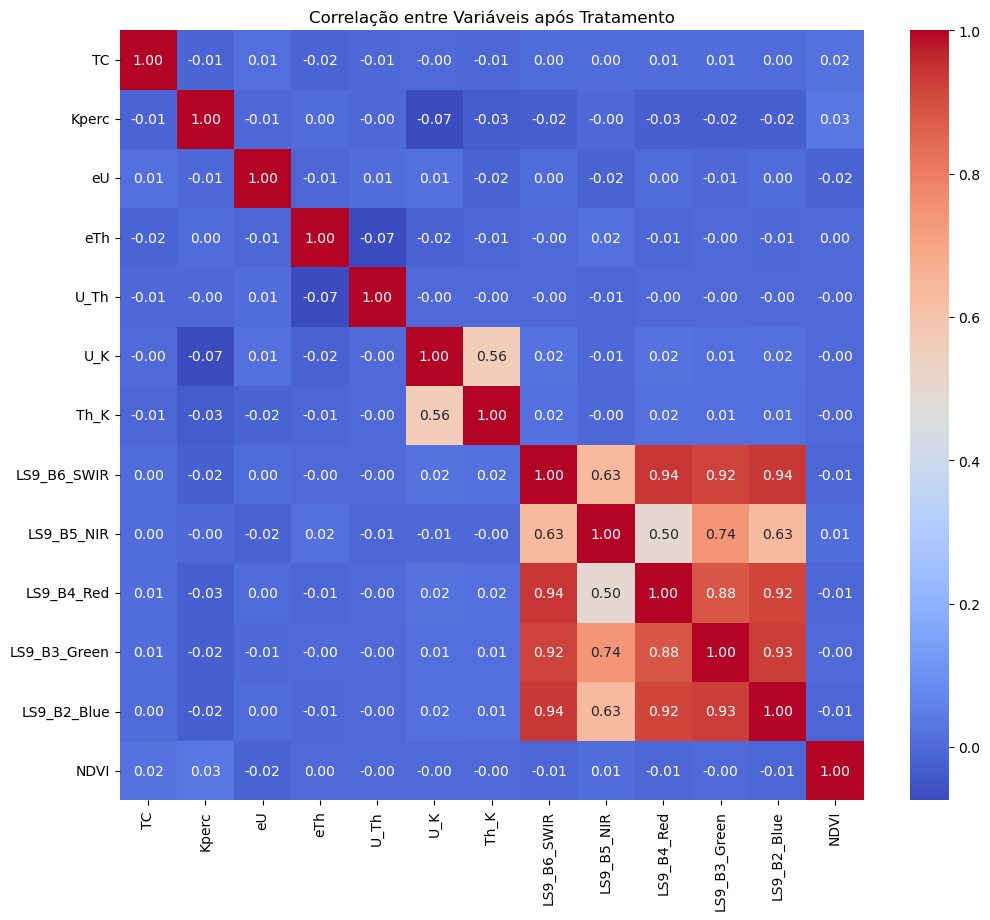

SIGLA_UNID
NP12vpf             1277
NP3sl                851
NP3sf                663
NP3an                658
NP3_gamma_ca         646
MP1_beta_am          639
NP3ps                508
NP3_beta_he          431
NP3C_cortado_1vz     323
NP3_alfa_avp         132
NP12vpfc              87
NP12vpfm              22
Name: count, dtype: int64


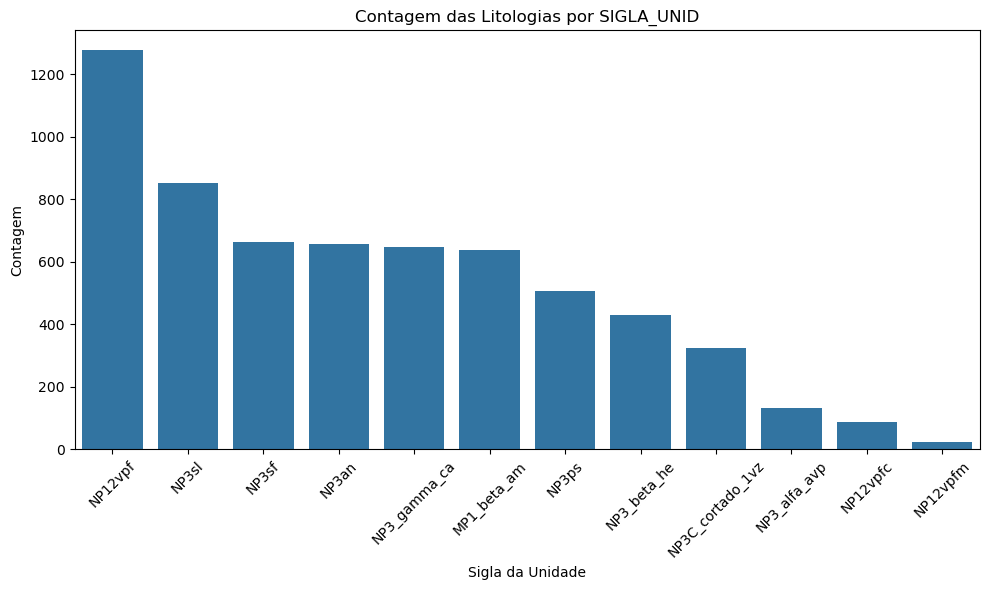

In [17]:
import matplotlib.pyplot as plt

# 1. Verifique distribuições das variáveis tratadas
plt.figure(figsize=(15, 10))
for i, col in enumerate(radiometric_cols[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col} após tratamento')
plt.tight_layout()
plt.show()

# 2. Mapa de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df[radiometric_cols + spectral_cols[:5] + ['NDVI']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis após Tratamento')
plt.show()

contagem_dos_locais = df['SIGLA_UNID'].value_counts()
print(contagem_dos_locais)
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário
sns.barplot(x=contagem_dos_locais.index, y=contagem_dos_locais.values)

# Adicionar títulos e formatação
plt.title('Contagem das Litologias por SIGLA_UNID')
plt.xlabel('Sigla da Unidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor legibilidade

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

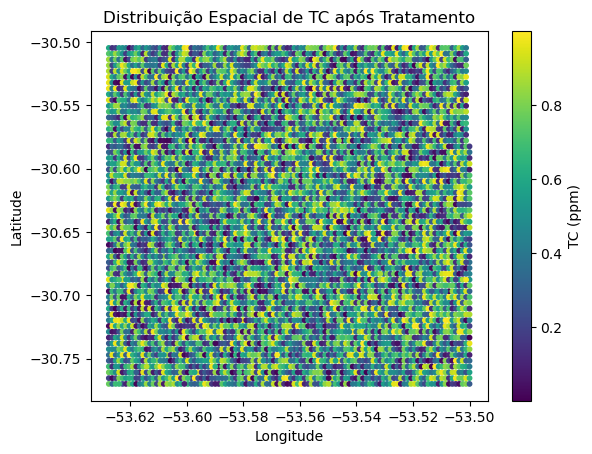

In [18]:
# Plotar mapa de distribuição de uma variável para verificar padrões espaciais
plt.scatter(df['lon'], df['lat'], c=df['TC'], cmap='viridis', s=10)
plt.colorbar(label='TC (ppm)')
plt.title('Distribuição Espacial de TC após Tratamento')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

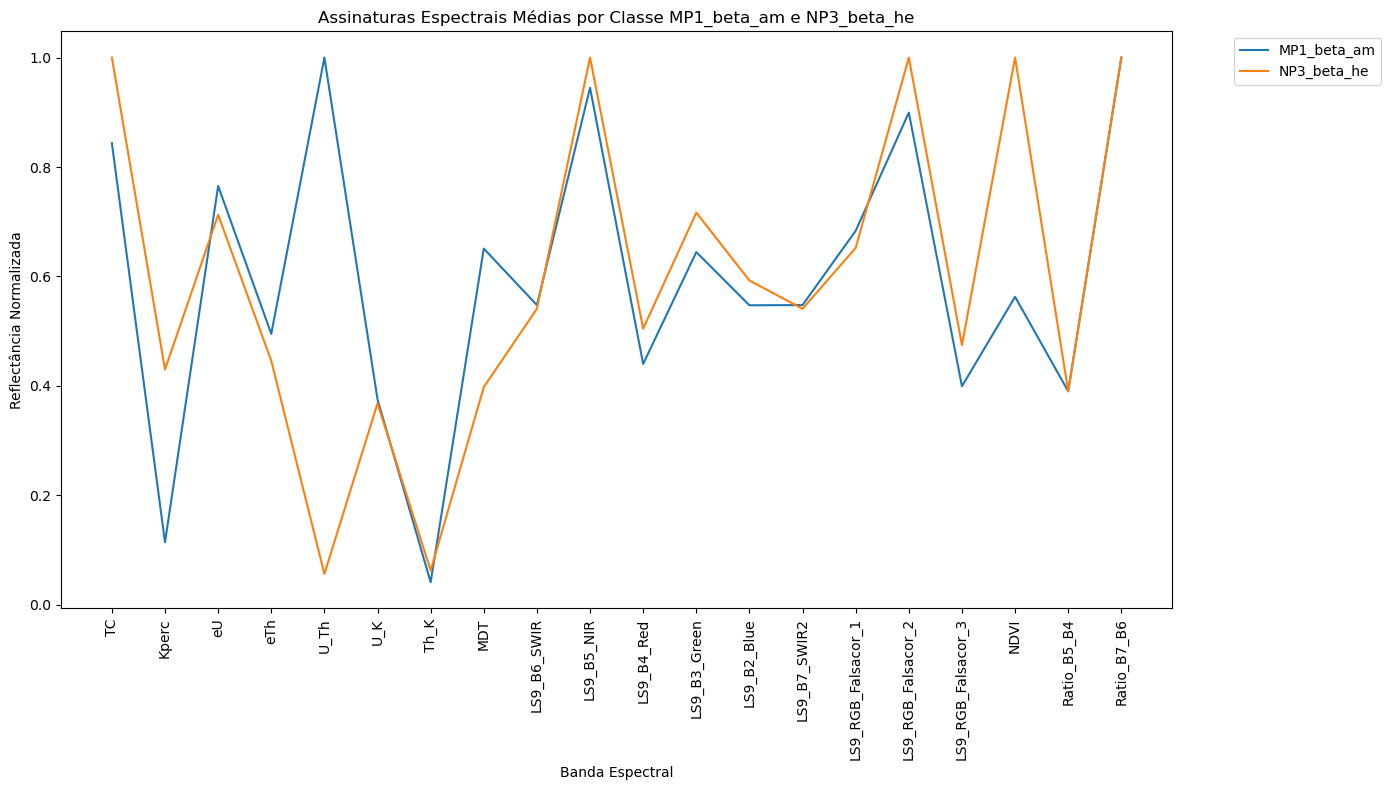

In [19]:
# Calcular médias por classe (excluindo colunas não espectrais)
spectral_bands = [col for col in df.columns if col not in ['SIGLA_UNID', 'COD_UNI_ES', 'fid','lon','lat']]
class_means = df.groupby('SIGLA_UNID')[spectral_bands].mean()

# Normalizar para comparação
class_means_norm = (class_means - class_means.min()) / (class_means.max() - class_means.min())

# Lista das classes que você quer plotar
classes_para_plotar = ['MP1_beta_am', 'NP3_beta_he'] # Substitua pelas classes desejadas

# Filtrar o DataFrame normalizado pelas classes de interesse
class_means_filtrado = class_means_norm.loc[classes_para_plotar]

# Plot
plt.figure(figsize=(14, 8))
for cls in class_means_filtrado.index:
    plt.plot(class_means_filtrado.columns, class_means_filtrado.loc[cls], label=cls)
plt.xticks(rotation=90)
plt.xlabel('Banda Espectral')
plt.ylabel('Reflectância Normalizada')
plt.title('Assinaturas Espectrais Médias por Classe MP1_beta_am e NP3_beta_he')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

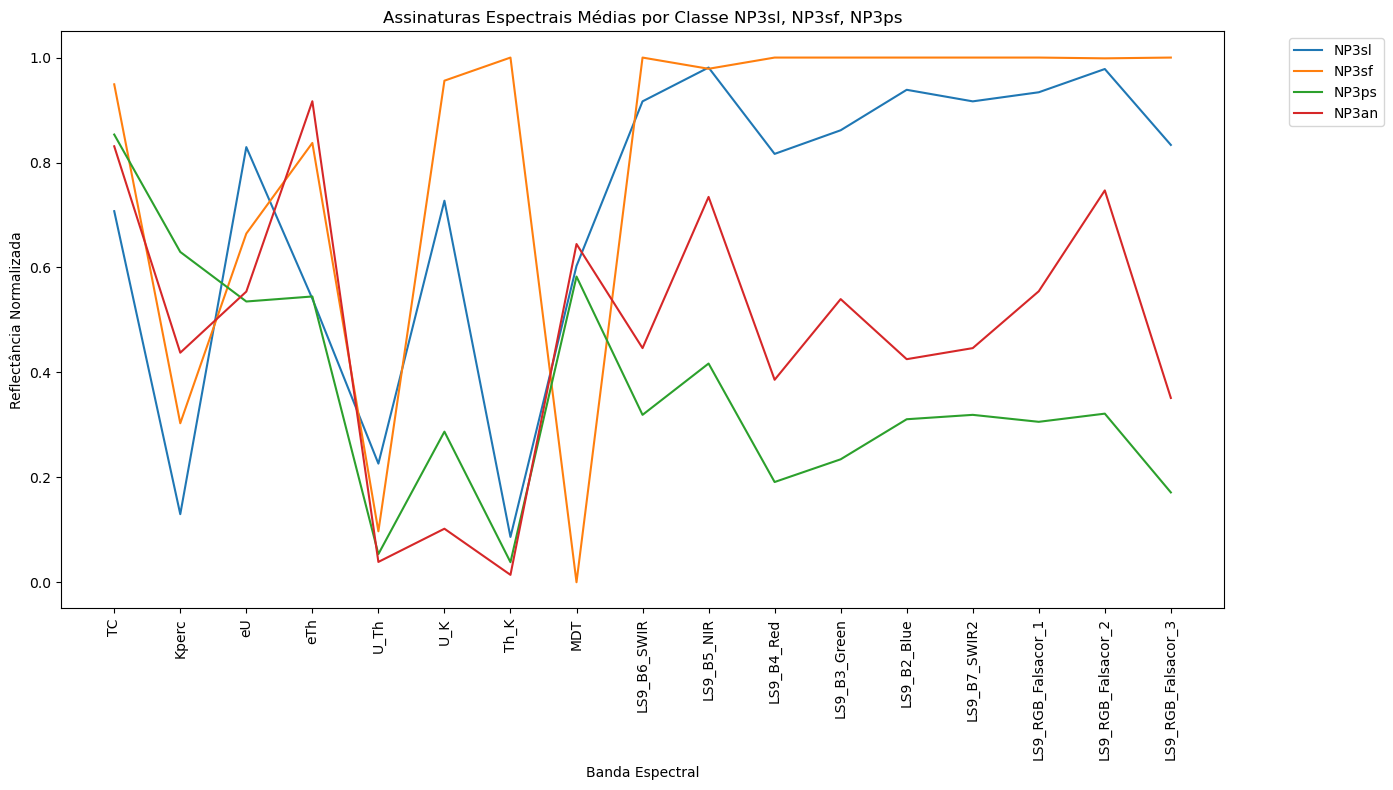

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que seu DataFrame 'df' já esteja carregado

# Calcular médias por classe (excluindo colunas não espectrais)
spectral_bands = [col for col in df.columns if col not in ['SIGLA_UNID', 'COD_UNI_ES', 'fid','lon','lat']]
class_means = df.groupby('SIGLA_UNID')[spectral_bands].mean()

# Normalizar para comparação
class_means_norm = (class_means - class_means.min()) / (class_means.max() - class_means.min())

# Lista das classes que você quer plotar
classes_para_plotar = ['NP3sl', 'NP3sf', 'NP3ps', 'NP3an'] # Substitua pelas classes desejadas

# Filtrar o DataFrame normalizado pelas classes de interesse
class_means_filtrado = class_means_norm.loc[classes_para_plotar]

# Plot
plt.figure(figsize=(14, 8))
for cls in class_means_filtrado.index:
    plt.plot(class_means_filtrado.columns, class_means_filtrado.loc[cls], label=cls)
plt.xticks(rotation=90)
plt.xlabel('Banda Espectral')
plt.ylabel('Reflectância Normalizada')
plt.title('Assinaturas Espectrais Médias por Classe NP3sl, NP3sf, NP3ps')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

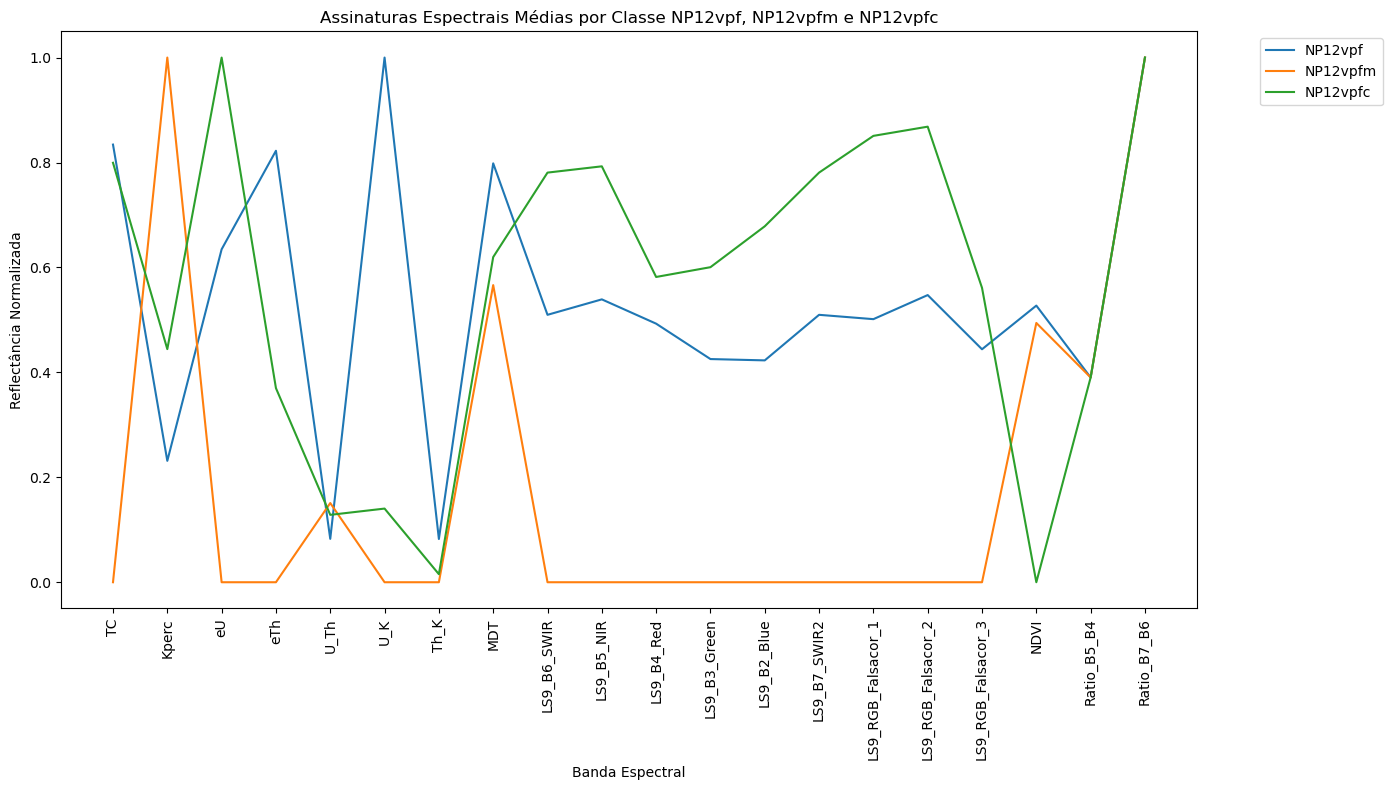

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que seu DataFrame 'df' já esteja carregado

# Calcular médias por classe (excluindo colunas não espectrais)
spectral_bands = [col for col in df.columns if col not in ['SIGLA_UNID', 'COD_UNI_ES', 'fid','lon','lat']]
class_means = df.groupby('SIGLA_UNID')[spectral_bands].mean()

# Normalizar para comparação
class_means_norm = (class_means - class_means.min()) / (class_means.max() - class_means.min())

# Lista das classes que você quer plotar
classes_para_plotar = ['NP12vpf', 'NP12vpfm', 'NP12vpfc'] # Substitua pelas classes desejadas

# Filtrar o DataFrame normalizado pelas classes de interesse
class_means_filtrado = class_means_norm.loc[classes_para_plotar]

# Plot
plt.figure(figsize=(14, 8))
for cls in class_means_filtrado.index:
    plt.plot(class_means_filtrado.columns, class_means_filtrado.loc[cls], label=cls)
plt.xticks(rotation=90)
plt.xlabel('Banda Espectral')
plt.ylabel('Reflectância Normalizada')
plt.title('Assinaturas Espectrais Médias por Classe NP12vpf, NP12vpfm e NP12vpfc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

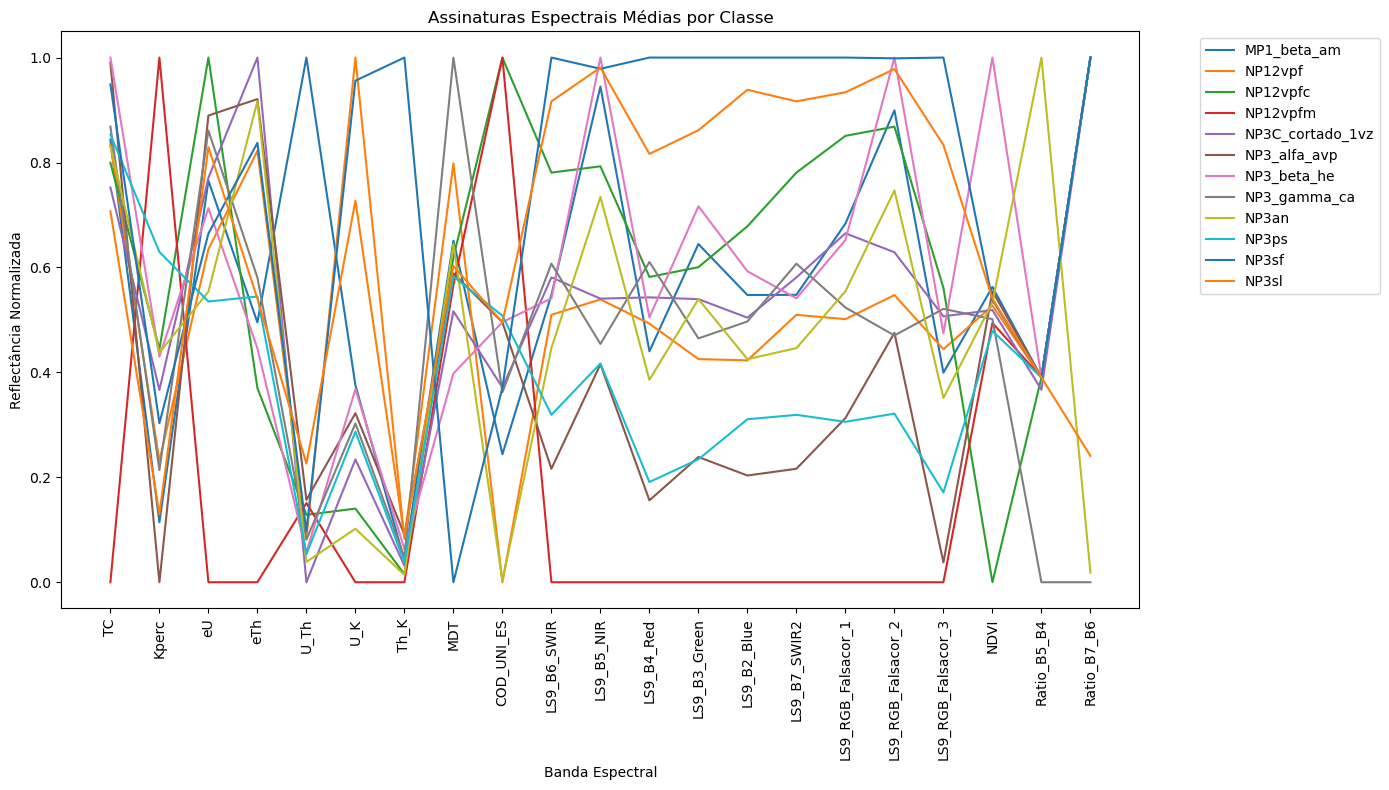

In [21]:
# Calcular médias por classe (excluindo colunas não espectrais)
spectral_bands = [col for col in df.columns if col not in ['SIGLA_UNID','fid','lon','lat']]
class_means = df.groupby('SIGLA_UNID')[spectral_bands].mean()

# Normalizar para comparação
class_means_norm = (class_means - class_means.min()) / (class_means.max() - class_means.min())

# Plot
plt.figure(figsize=(14, 8))
for cls in class_means_norm.index:
    plt.plot(class_means_norm.columns, class_means_norm.loc[cls], label=cls)
plt.xticks(rotation=90)
plt.xlabel('Banda Espectral')
plt.ylabel('Reflectância Normalizada')
plt.title('Assinaturas Espectrais Médias por Classe')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Agregação de Classes 

In [38]:
regras_agreg = {
    #Junção das classes do COMPLEXO PASSO FEIO (NP12vpf)
    'NP12vpfc': 'NP12vpf', 
    'NP12vpfm': 'NP12vpf',   
    
    # Junção das classes do Grupo Santa Bárbara (NP3ps)
     'NP3sl': 'NP3ps', 
     'NP3sf': 'NP3ps',
     
 }

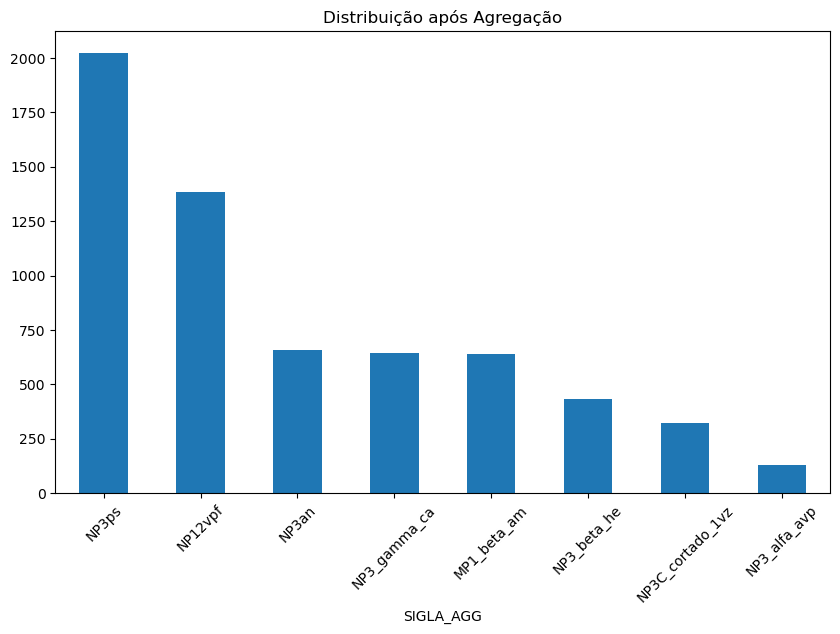

In [39]:
# Criar nova coluna com classes agregadas
df['SIGLA_AGG'] = df['SIGLA_UNID'].replace(regras_agreg)

# Verificar distribuição resultante
plt.figure(figsize=(10,6))
df['SIGLA_AGG'].value_counts().plot.bar()
plt.xticks(rotation=45)
plt.title('Distribuição após Agregação')
plt.show()

SIGLA_AGG
NP3ps               2022
NP12vpf             1386
NP3an                658
NP3_gamma_ca         646
MP1_beta_am          639
NP3_beta_he          431
NP3C_cortado_1vz     323
NP3_alfa_avp         132
Name: count, dtype: int64


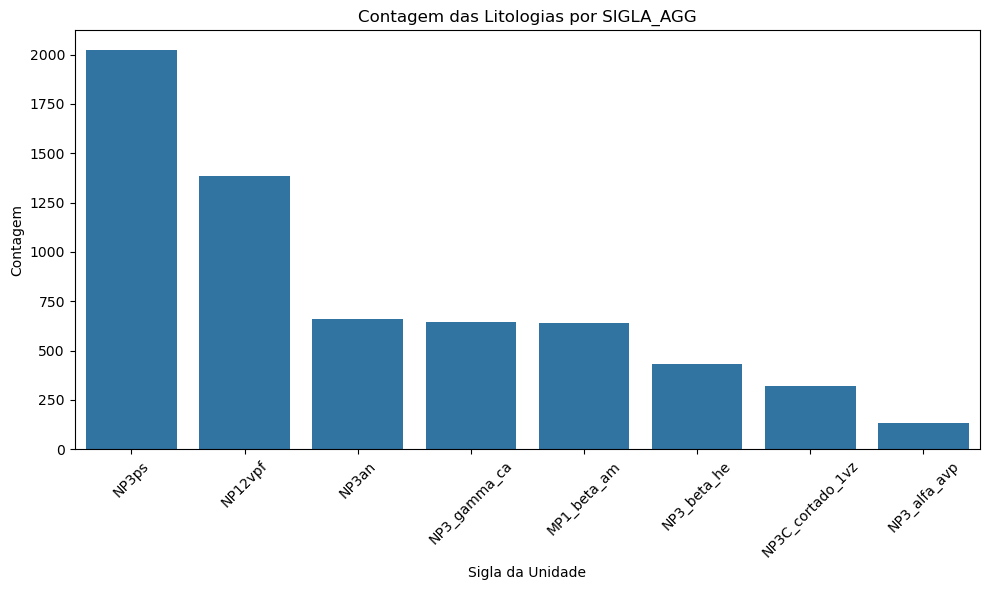

In [40]:
contagem_dos_locais = df['SIGLA_AGG'].value_counts()
print(contagem_dos_locais)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário
sns.barplot(x=contagem_dos_locais.index, y=contagem_dos_locais.values)

# Adicionar títulos e formatação
plt.title('Contagem das Litologias por SIGLA_AGG')
plt.xlabel('Sigla da Unidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor legibilidade

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()


In [41]:
area_status = df.groupby('SIGLA_AGG')[['TC', 'Kperc', 'eU', 'eTh', 'MDT']].describe()
print(area_status)

                      TC                                                    \
                   count      mean       std       min       25%       50%   
SIGLA_AGG                                                                    
MP1_beta_am        639.0  0.501287  0.285977  0.000549  0.258482  0.500463   
NP12vpf           1386.0  0.497534  0.296170  0.000447  0.227187  0.503339   
NP3C_cortado_1vz   323.0  0.487520  0.284093  0.004327  0.252284  0.460667   
NP3_alfa_avp       132.0  0.523412  0.295286  0.007194  0.265876  0.524392   
NP3_beta_he        431.0  0.524860  0.293014  0.001415  0.287212  0.536575   
NP3_gamma_ca       646.0  0.505011  0.297782  0.000746  0.241469  0.494080   
NP3an              658.0  0.499369  0.278096  0.002206  0.250986  0.516477   
NP3ps             2022.0  0.498210  0.286626  0.000044  0.253194  0.493283   

                                       Kperc            ...       eTh  \
                       75%       max   count      mean  ...       75

In [42]:
# Verifique se há valores radiométricos extremos
print(df[df['U_Th'] > 20][['fid','U_Th']])

# Verifique a faixa de elevação
print(f"MDT range: {df['MDT'].min()} to {df['MDT'].max()}")

# Verifique coordenadas duplicadas
coord_dupes = df[df.duplicated(subset=['lon','lat'])]
print(f"{len(coord_dupes)} duplicate coordinate pairs")

       fid        U_Th
6        7   67.670866
194    195   20.531909
205    206  147.888172
230    231   32.162355
241    242   21.119290
...    ...         ...
6040  6041   30.196590
6078  6079   72.112078
6094  6095   52.015172
6124  6125  149.030925
6151  6152   45.550276

[161 rows x 2 columns]
MDT range: 109.0 to 446.0
0 duplicate coordinate pairs


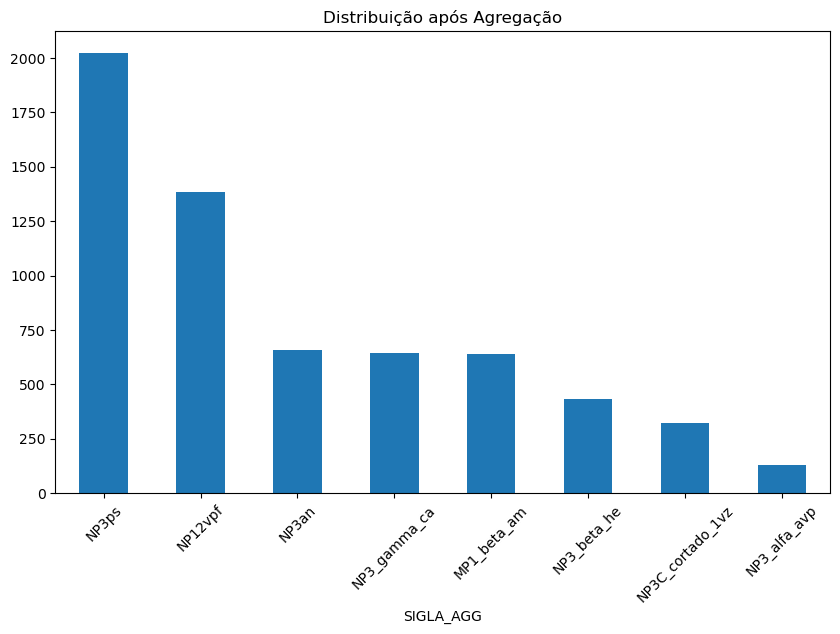

In [43]:
# Criar nova coluna com classes agregadas
df['SIGLA_AGG'] = df['SIGLA_UNID'].replace(regras_agreg)

# Verificar distribuição resultante
plt.figure(figsize=(10,6))
df['SIGLA_AGG'].value_counts().plot.bar()
plt.xticks(rotation=45)
plt.title('Distribuição após Agregação')
plt.show()

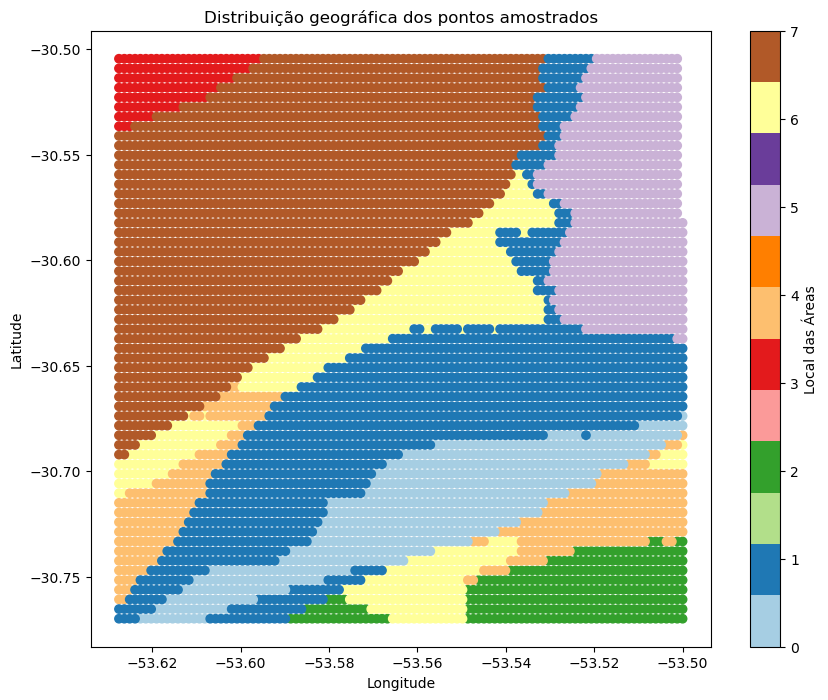

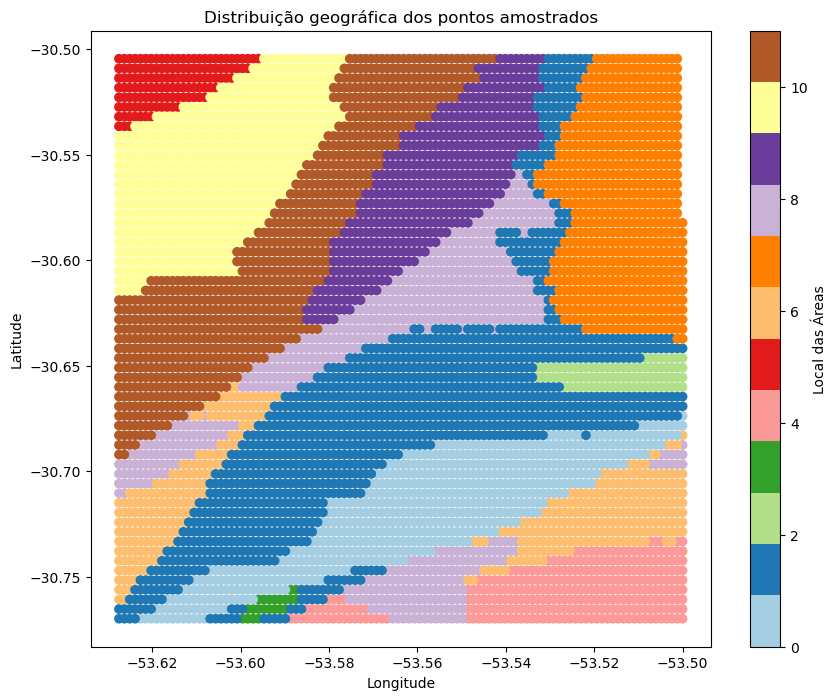

In [44]:
#AGG

plt.figure(figsize=(10,8))
plt.scatter(df['lon'], df['lat'], c=df['SIGLA_AGG'].astype('category').cat.codes, cmap='Paired') 
plt.colorbar(label='Local das Áreas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição geográfica dos pontos amostrados')
plt.show()

#SIGLA Unidade
plt.figure(figsize=(10,8))
plt.scatter(df['lon'], df['lat'], c=df['SIGLA_UNID'].astype('category').cat.codes, cmap='Paired') 
plt.colorbar(label='Local das Áreas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição geográfica dos pontos amostrados')
plt.show()

In [45]:
# Listar tipos de dados de cada coluna
print(df.dtypes)

# Ou identificar colunas não numéricas
non_numeric = df.select_dtypes(exclude=['number']).columns
print("Colunas não numéricas:", list(non_numeric))

fid                     int64
lon                   float64
lat                   float64
TC                    float64
Kperc                 float64
eU                    float64
eTh                   float64
U_Th                  float64
U_K                   float64
Th_K                  float64
MDT                   float64
COD_UNI_ES            float64
SIGLA_UNID             object
LS9_B6_SWIR           float64
LS9_B5_NIR            float64
LS9_B4_Red            float64
LS9_B3_Green          float64
LS9_B2_Blue           float64
LS9_B7_SWIR2          float64
LS9_RGB_Falsacor_1    float64
LS9_RGB_Falsacor_2    float64
LS9_RGB_Falsacor_3    float64
NDVI                  float64
Ratio_B5_B4           float64
Ratio_B7_B6           float64
SIGLA_AGG              object
dtype: object
Colunas não numéricas: ['SIGLA_UNID', 'SIGLA_AGG']


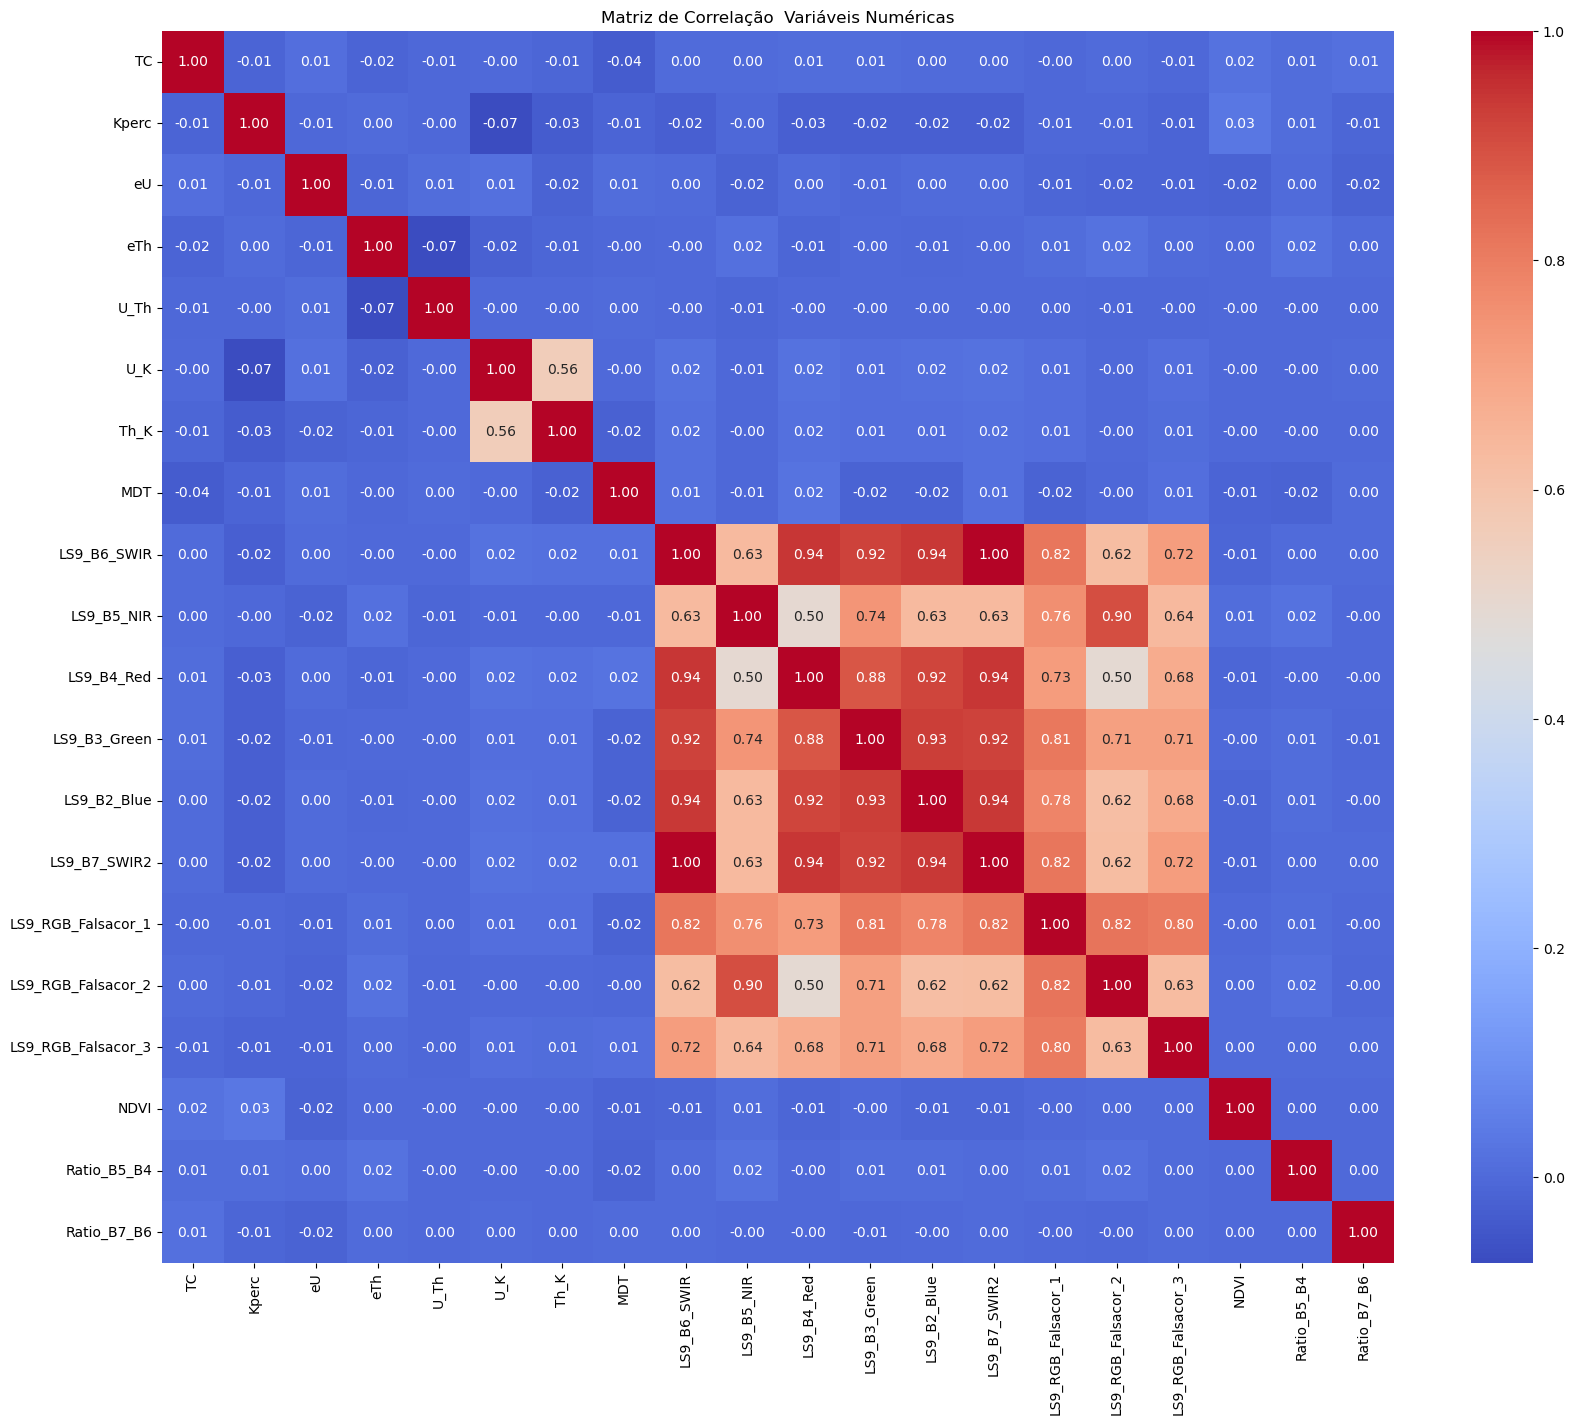

In [46]:
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Remover colunas específicas que não queremos (se necessário)
cols_to_drop = ['fid', 'lon', 'lat', 'COD_UNI_ES']  # Exemplo
numeric_df = numeric_df.drop([col for col in cols_to_drop if col in numeric_df.columns], axis=1)

# Calcular a matriz de correlação
corr_matrix = numeric_df.corr()

# Plotar
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Matriz de Correlação  Variáveis Numéricas')
plt.show()

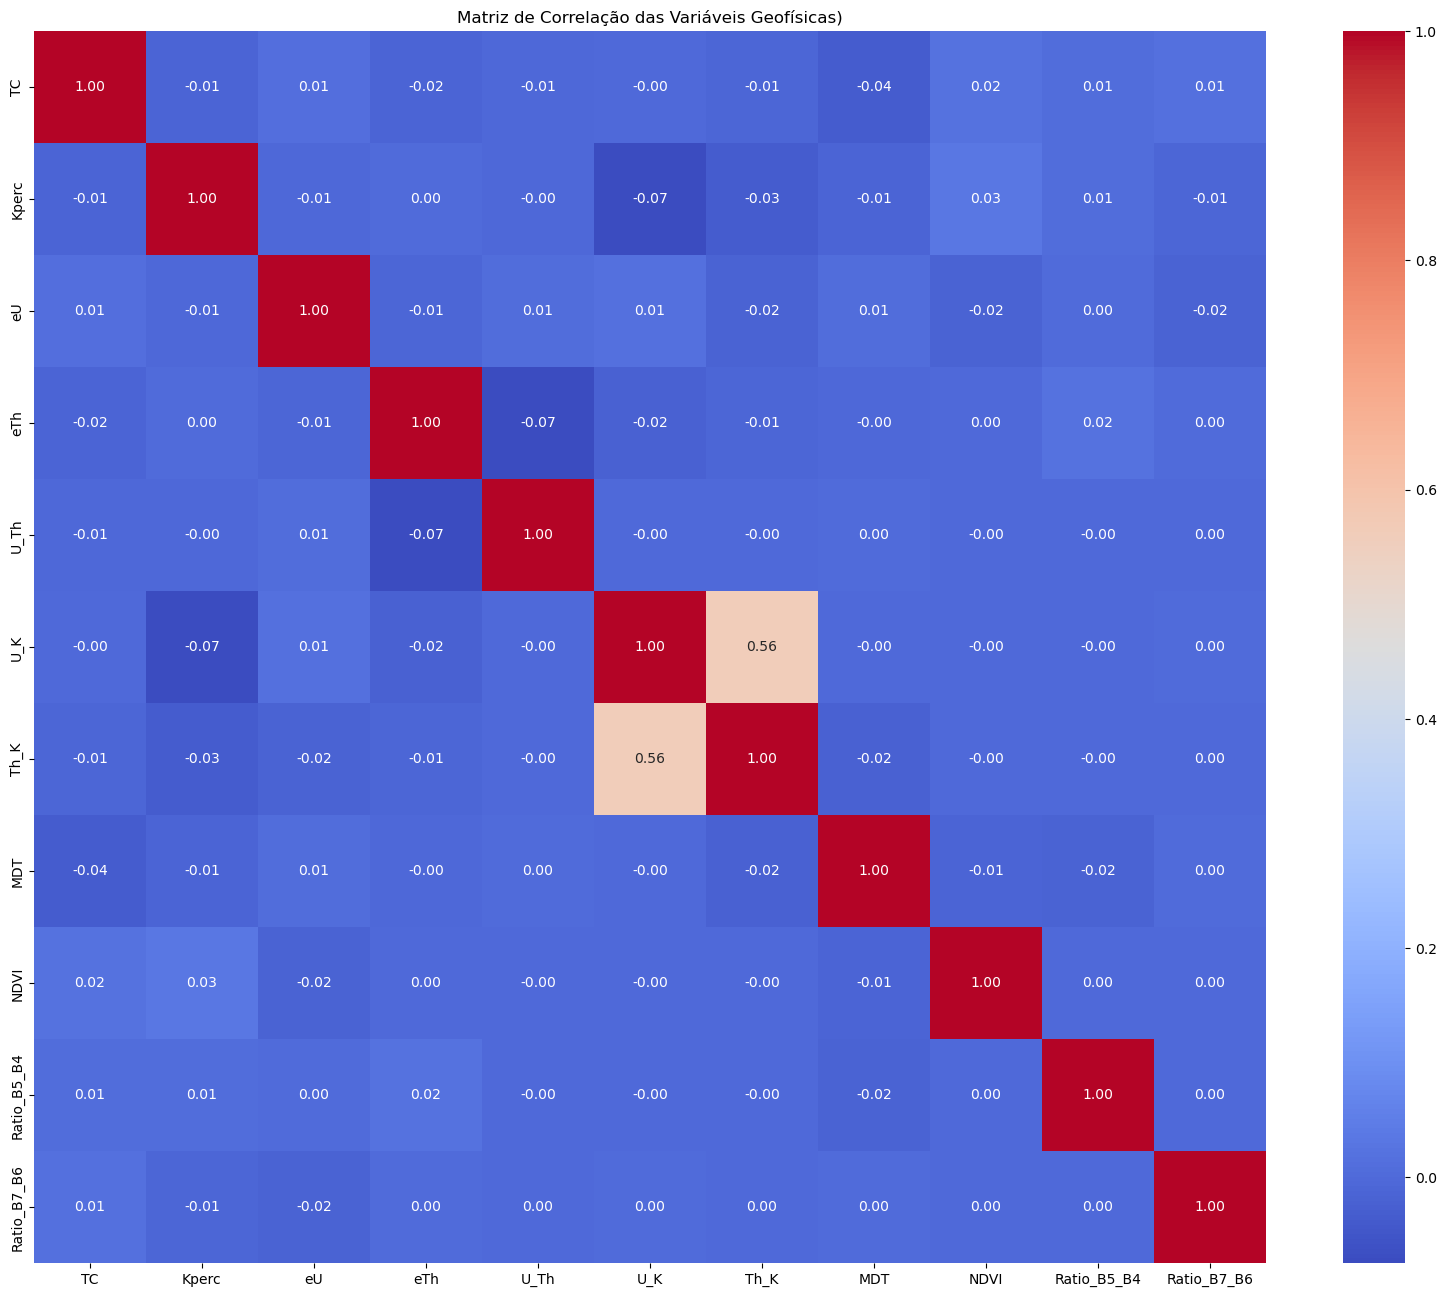

In [47]:
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Remover colunas específicas que não queremos (se necessário)
cols_to_drop = ['fid', 'lon', 'lat', 'SIGLA_AGG', 'COD_UNI_ES', 'LS9_B6_SWIR',
 'LS9_B5_NIR',
 'LS9_B4_Red',
 'LS9_B3_Green',
 'LS9_B2_Blue',
 'LS9_B7_SWIR2',
 'LS9_RGB_Falsacor_1',
 'LS9_RGB_Falsacor_2',
 'LS9_RGB_Falsacor_3']  # Exemplo
numeric_df = numeric_df.drop([col for col in cols_to_drop if col in numeric_df.columns], axis=1)

# Calcular a matriz de correlação
corr_matrix = numeric_df.corr()

# Plotar
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Geofísicas)')
plt.show()




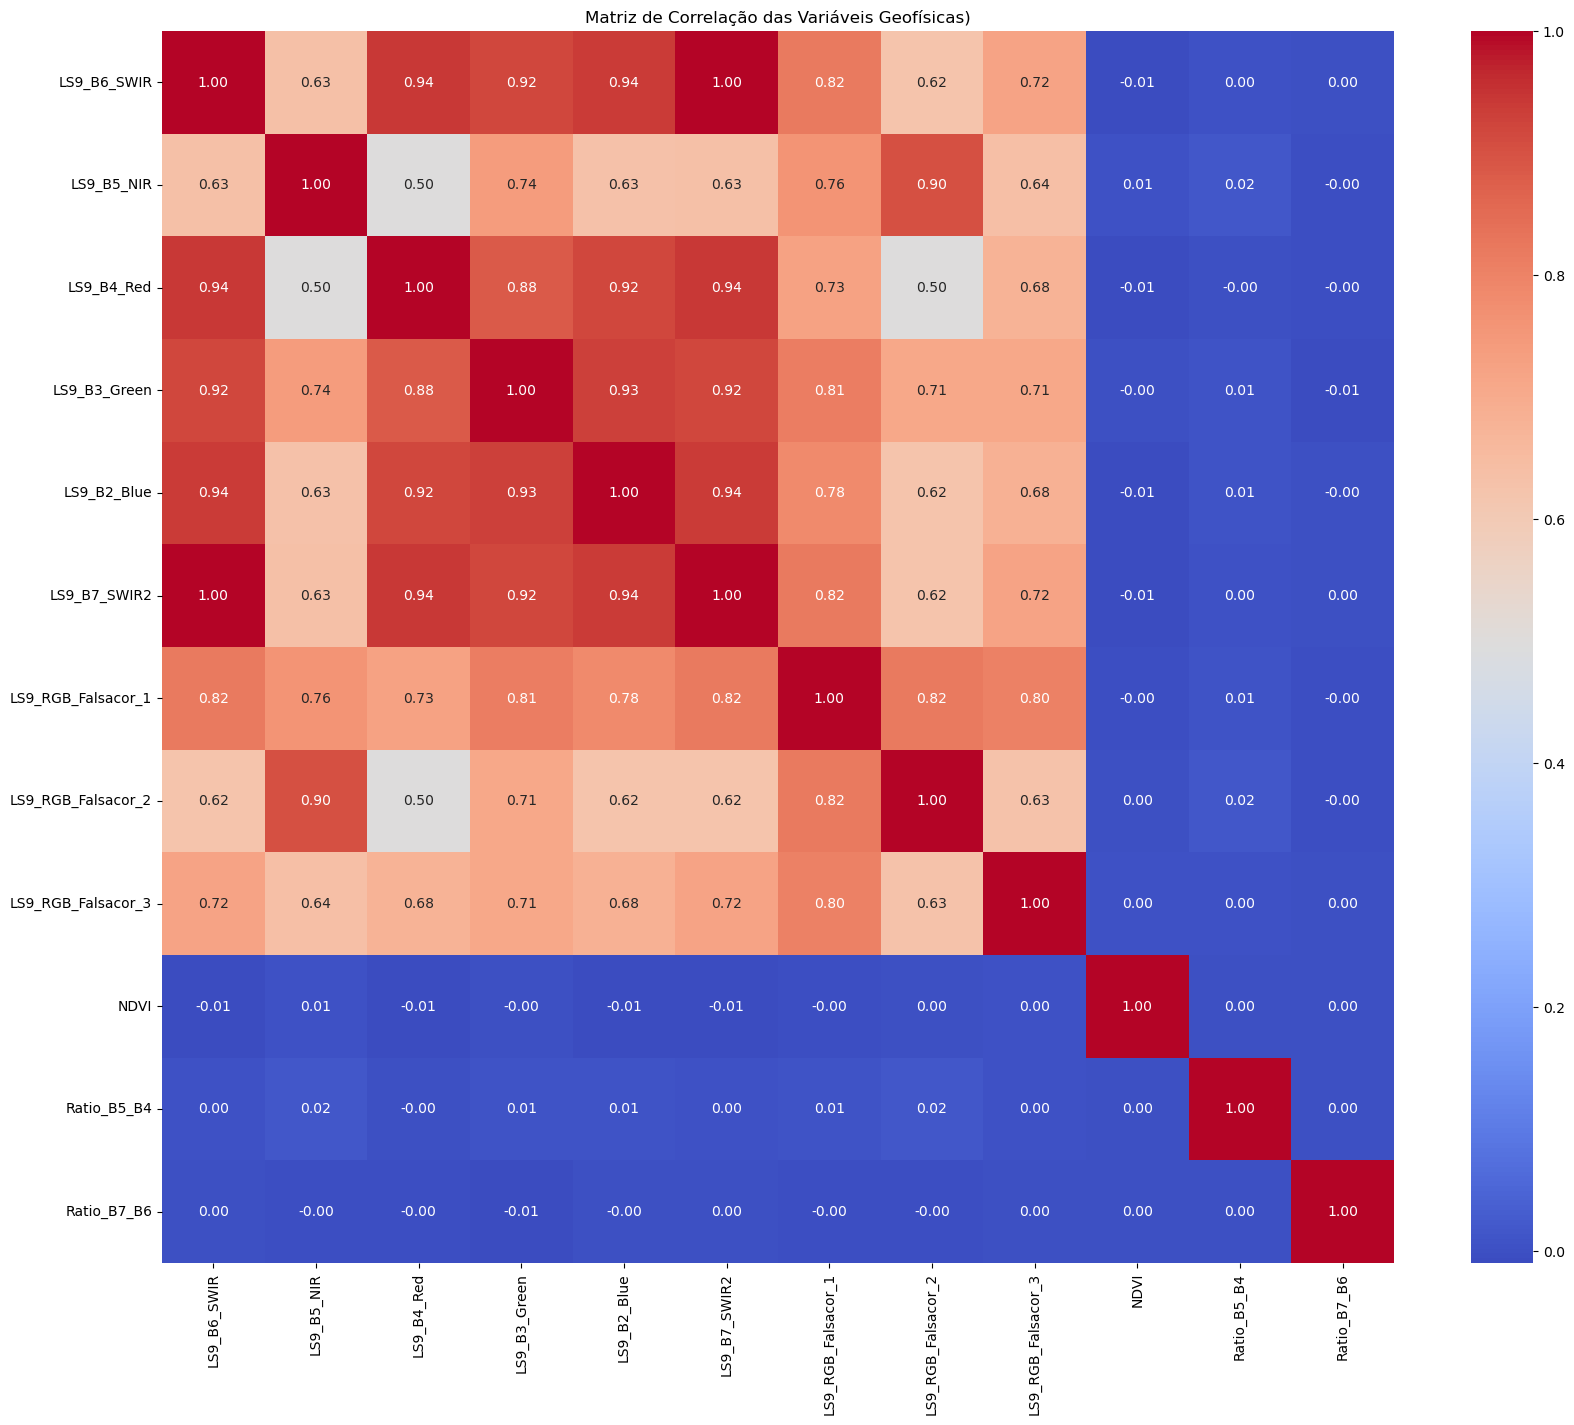

In [48]:


# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Remover colunas específicas que não queremos (se necessário)
cols_to_drop = ['fid', 'lon', 'lat', 'SIGLA_AGG', 'COD_UNI_ES','TC',
 'Kperc',
 'eU',
 'eTh',
 'U_Th',
 'U_K',
 'Th_K',
 'MDT']  # Exemplo
numeric_df = numeric_df.drop([col for col in cols_to_drop if col in numeric_df.columns], axis=1)

# Calcular a matriz de correlação
corr_matrix = numeric_df.corr()

# Plotar
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Matriz de Correlação das Variáveis Geofísicas)')
plt.show()


### Criando o modelo a partir do Random Forest

In [49]:
# Definindo X e y (todas as amostras)
X = df.drop(['fid','SIGLA_AGG', 'COD_UNI_ES'], axis=1)  # Exclui target + IDs
y = df['SIGLA_AGG']  # Ou 'COD_UNI_ES', conforme seu target

# Verificação global
print("Variáveis preditoras (X):", X.columns.tolist())
print("Variável target (y):", y.name)
print("\nShape de X (todas amostras):", X.shape)
print("Shape de y (todas amostras):", y.shape)
print("\nDistribuição original das classes:\n", y.value_counts())

Variáveis preditoras (X): ['lon', 'lat', 'TC', 'Kperc', 'eU', 'eTh', 'U_Th', 'U_K', 'Th_K', 'MDT', 'SIGLA_UNID', 'LS9_B6_SWIR', 'LS9_B5_NIR', 'LS9_B4_Red', 'LS9_B3_Green', 'LS9_B2_Blue', 'LS9_B7_SWIR2', 'LS9_RGB_Falsacor_1', 'LS9_RGB_Falsacor_2', 'LS9_RGB_Falsacor_3', 'NDVI', 'Ratio_B5_B4', 'Ratio_B7_B6']
Variável target (y): SIGLA_AGG

Shape de X (todas amostras): (6237, 23)
Shape de y (todas amostras): (6237,)

Distribuição original das classes:
 SIGLA_AGG
NP3ps               2022
NP12vpf             1386
NP3an                658
NP3_gamma_ca         646
MP1_beta_am          639
NP3_beta_he          431
NP3C_cortado_1vz     323
NP3_alfa_avp         132
Name: count, dtype: int64


In [50]:
# 1. Definir features e target
features = [  'lon', 'lat','TC', 'Kperc', 'eU', 'eTh', 'U_Th', 'U_K', 'Th_K', 
           'LS9_B2_Blue', 'LS9_B3_Green', 'LS9_B4_Red',
           'LS9_B5_NIR', 'LS9_B6_SWIR', 'LS9_B7_SWIR2']
target = 'SIGLA_AGG'  # ou 'COD_UNI_ES'

# 2. Amostragem estratificada - garantindo 150 por classe no treino
train_data = pd.DataFrame()

for classe in df[target].unique():
    classe_df = df[df[target] == classe]
    
    if len(classe_df) >= 150:
        # Pegar 150 para treino e o resto vai para teste
        train_classe = classe_df.sample(n=150, random_state=42)
        train_data = pd.concat([train_data, train_classe])
    else:
        # Se menos que 150, usar 70% para treino
        train_classe, _ = train_test_split(classe_df, train_size=0.7, random_state=42)
        train_data = pd.concat([train_data, train_classe])

# 3. Conjunto de teste é tudo que não está no treino
test_data = df[~df.index.isin(train_data.index)]

# 4. Separar features e target
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# 5. Verificação
print(f"Treino: {len(X_train)} amostras")
print(f"Teste: {len(X_test)} amostras")
print("\nDistribuição no treino:")
print(y_train.value_counts())
print("\nDistribuição no teste:")
print(y_test.value_counts())

Treino: 1142 amostras
Teste: 5095 amostras

Distribuição no treino:
SIGLA_AGG
NP12vpf             150
NP3C_cortado_1vz    150
NP3an               150
NP3_beta_he         150
MP1_beta_am         150
NP3ps               150
NP3_gamma_ca        150
NP3_alfa_avp         92
Name: count, dtype: int64

Distribuição no teste:
SIGLA_AGG
NP3ps               1872
NP12vpf             1236
NP3an                508
NP3_gamma_ca         496
MP1_beta_am          489
NP3_beta_he          281
NP3C_cortado_1vz     173
NP3_alfa_avp          40
Name: count, dtype: int64


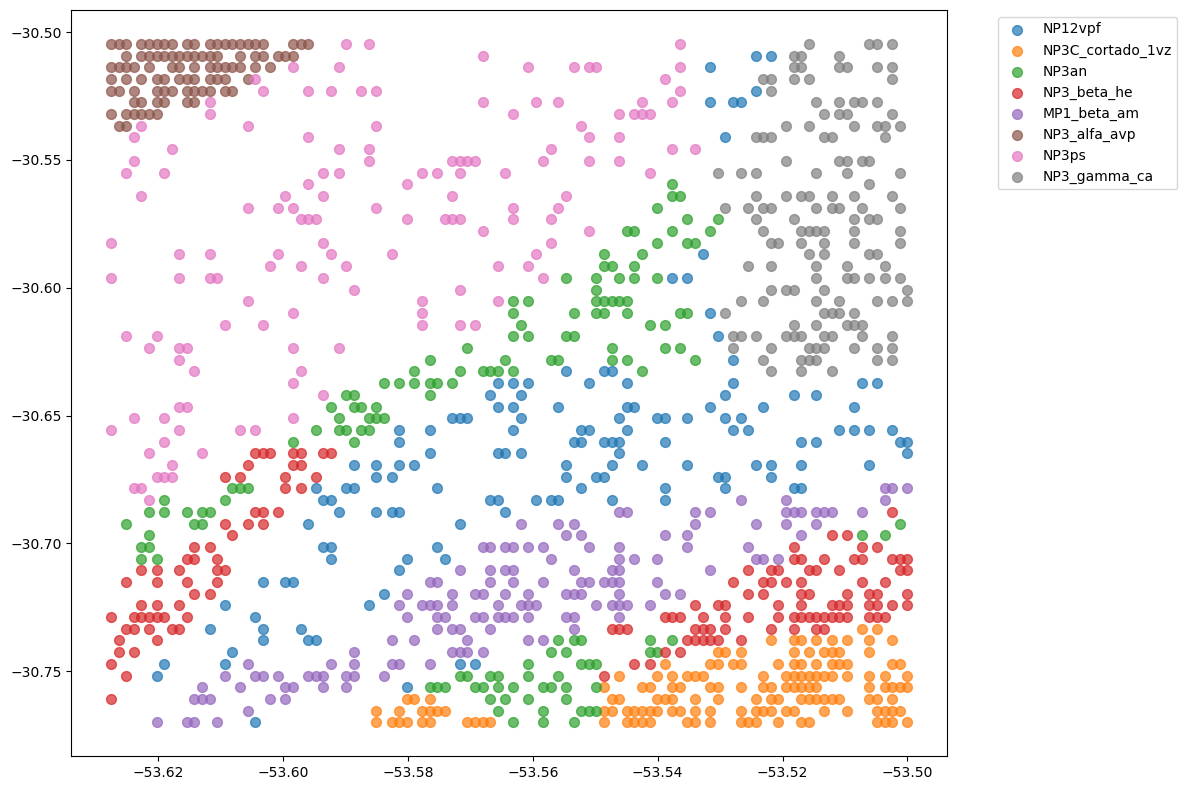

In [51]:
# Agora usando train_data que contém as coordenadas
plt.figure(figsize=(12,8))
for classe in train_data[target].unique():
    subset = train_data[train_data[target] == classe]
    plt.scatter(subset['lon'], subset['lat'], label=classe, s=50, alpha=0.7)
    
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

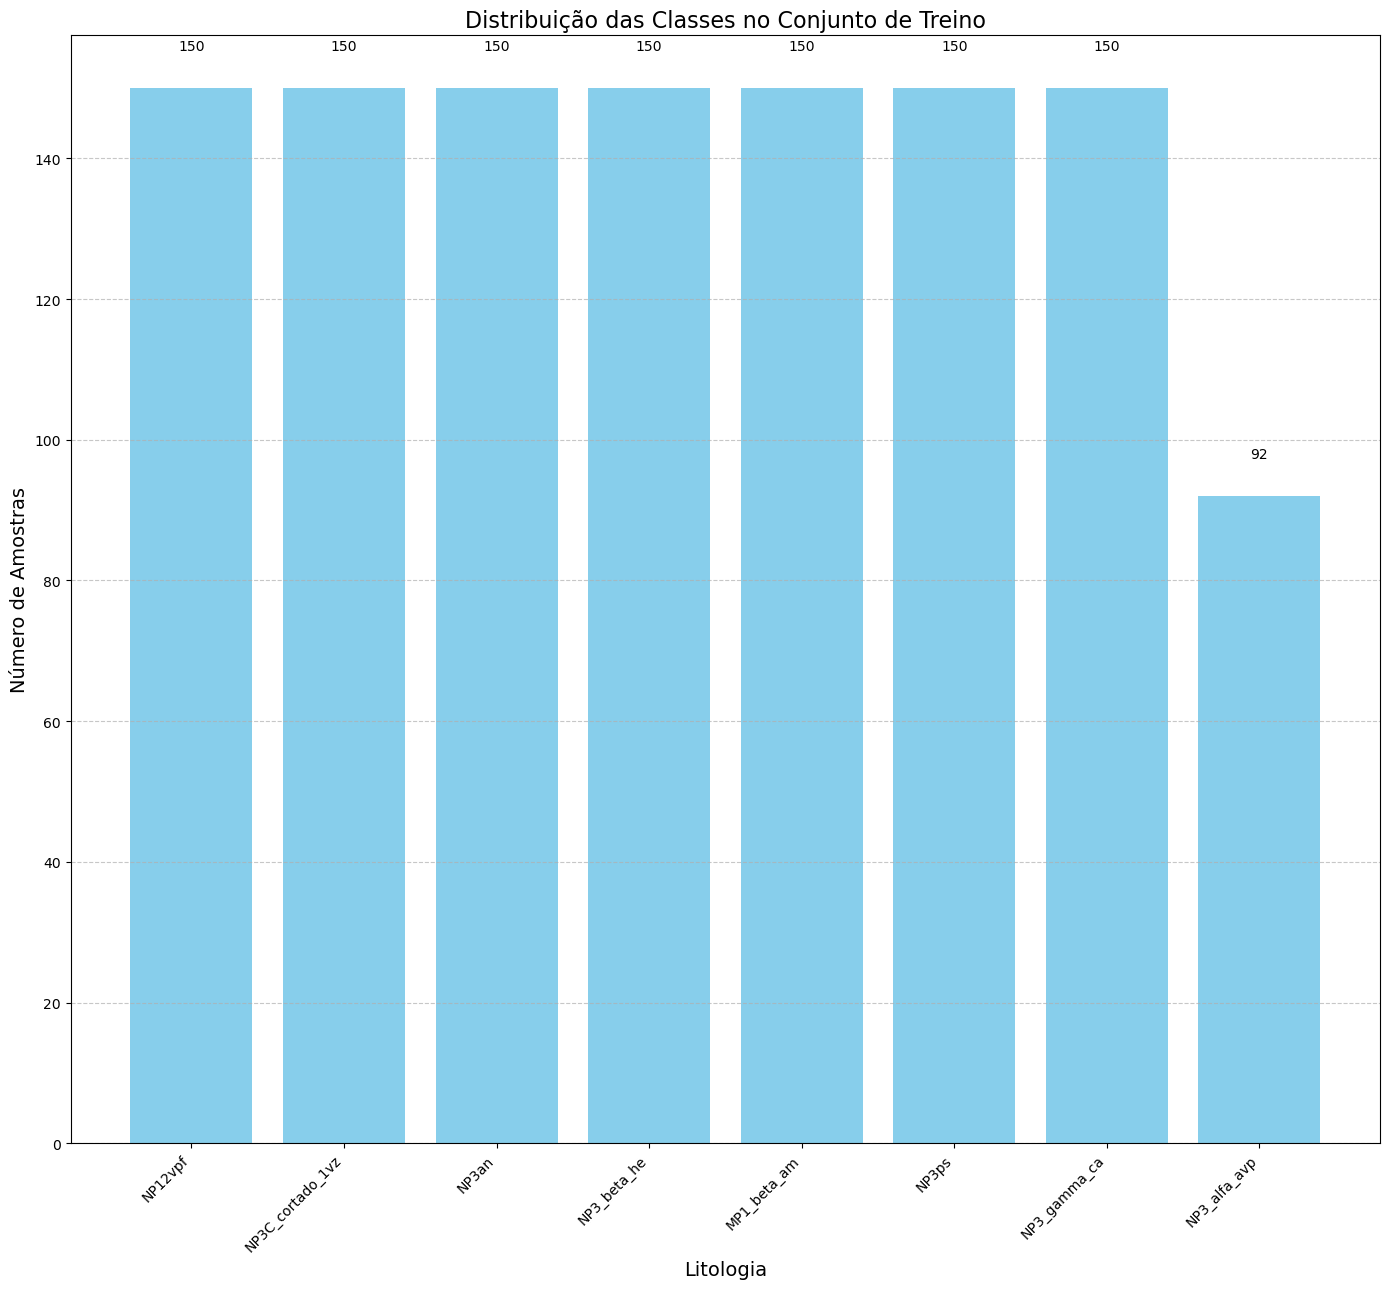

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Preparar os dados
class_dist = y_train.value_counts().reset_index()
class_dist.columns = ['Litologia', 'Quantidade']
class_dist = class_dist.sort_values('Quantidade', ascending=False)

# 2. Criar figura
plt.figure(figsize=(14, 13))

# Opção 1: Gráfico de barras simples (matplotlib)
plt.bar(class_dist['Litologia'], class_dist['Quantidade'], color='skyblue')
plt.title('Distribuição das Classes no Conjunto de Treino', fontsize=16)
plt.xlabel('Litologia', fontsize=14)
plt.ylabel('Número de Amostras', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for i, value in enumerate(class_dist['Quantidade']):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [53]:
df_treino = train_data

# Save to CSV
df_treino.to_csv('treino_PFeio_AGG.csv', index=False)

print('CSV salvo com sucesso !!')

CSV salvo com sucesso !!


### SMOTE

In [54]:

#smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
#X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)
X_train_smt, y_train_smt = SMOTE().fit_resample(X_train, y_train)

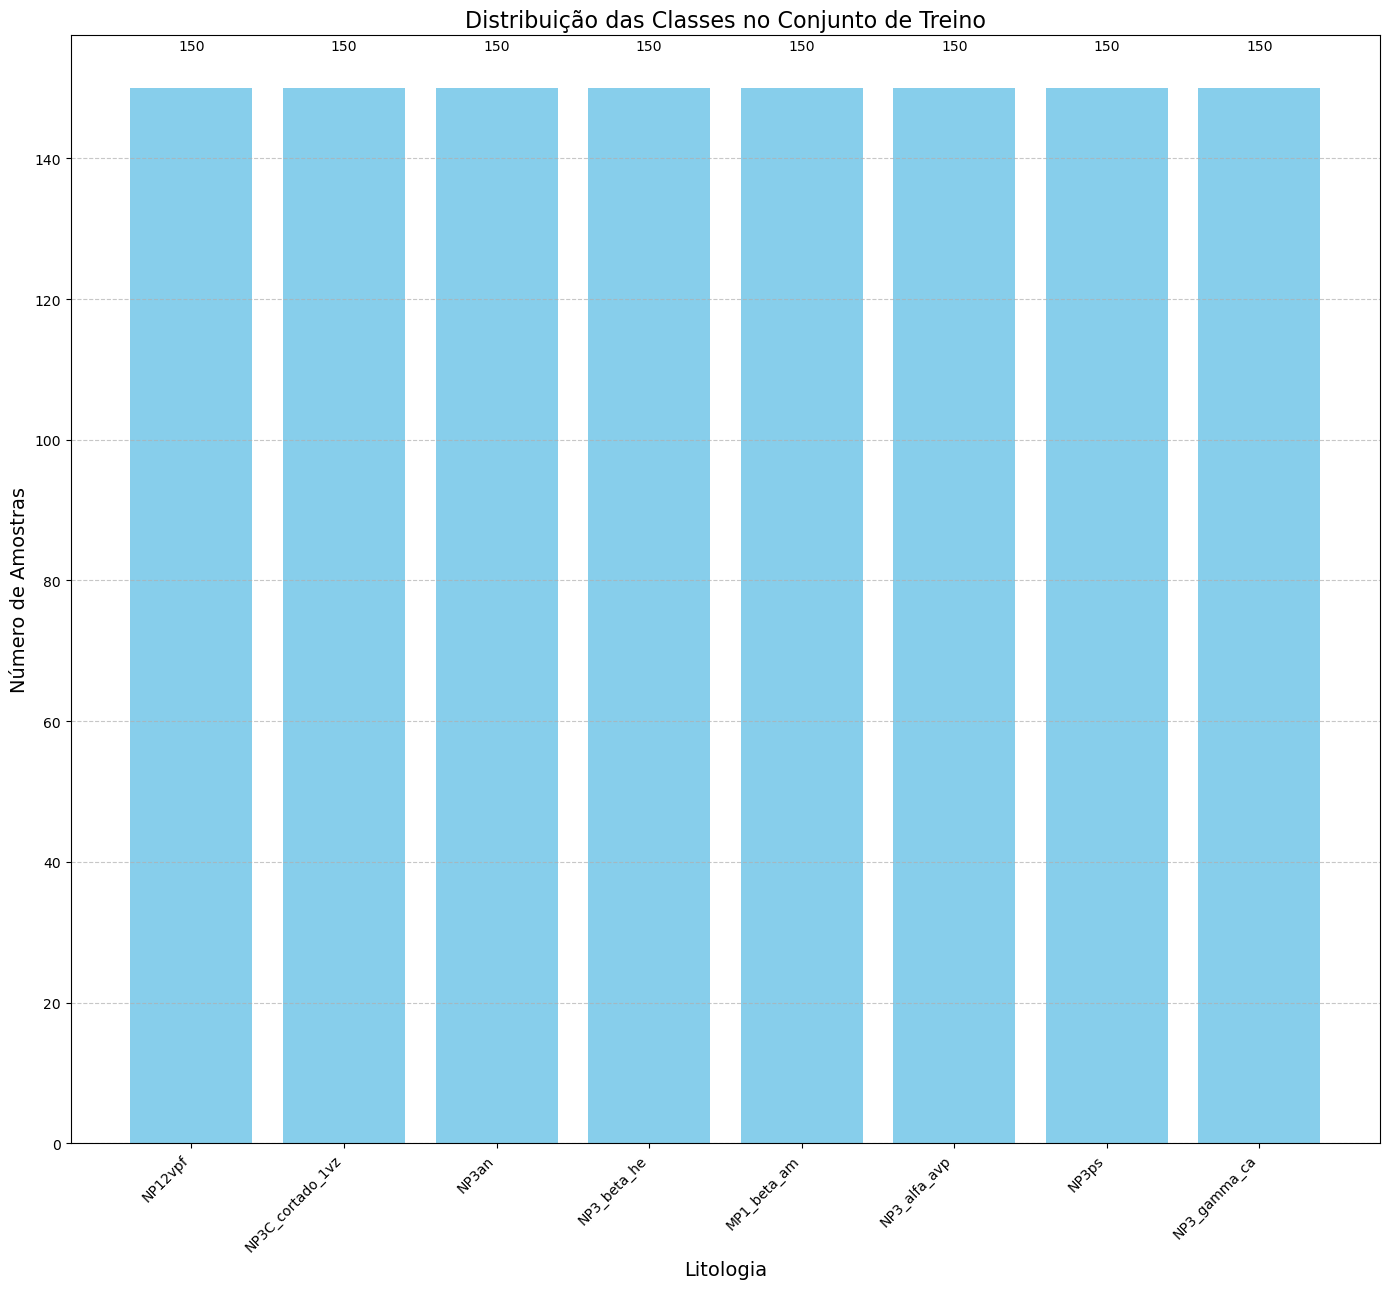

In [55]:
class_dist = y_train_smt.value_counts().reset_index()
class_dist.columns = ['Litologia', 'Quantidade']
class_dist = class_dist.sort_values('Quantidade', ascending=False)

# 2. Criar figura
plt.figure(figsize=(14, 13))

# Opção 1: Gráfico de barras simples (matplotlib)
plt.bar(class_dist['Litologia'], class_dist['Quantidade'], color='skyblue')
plt.title('Distribuição das Classes no Conjunto de Treino', fontsize=16)
plt.xlabel('Litologia', fontsize=14)
plt.ylabel('Número de Amostras', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for i, value in enumerate(class_dist['Quantidade']):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', RandomForestClassifier(class_weight='balanced_subsample'))
])

In [58]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold

# Pipeline com pré-processamento
pipeline = Pipeline([
    ('scaler', RobustScaler()),  # Menos sensível a outliers que StandardScaler
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced_subsample'  # Versão melhorada para RF
    ))
])

# Grade de parâmetros expandida
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt']  # Adicionado controle de features
}

# Usando validação cruzada estratificada e balanced_accuracy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='balanced_accuracy',  # Melhor para classes desbalanceadas
    n_jobs=-1,
    verbose=2  # Mostra progresso
)

grid_search.fit(X_train_smt, y_train_smt)  # Usando dados balanceados

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced_subsample',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__max_features': ['sqrt'],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='balanced_accuracy', verbose=2)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score

# Obter o melhor modelo
best_rf = grid_search.best_estimator_

# Fazer previsões
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)

# Métricas básicas
print(f"Melhores parâmetros: {grid_search.best_params_}\n")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print(f"Acurácia Balanceada: {balanced_accuracy_score(y_test, y_pred):.4f}\n")
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Melhores parâmetros: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Acurácia: 0.7772
Acurácia Balanceada: 0.8029

Relatório de Classificação:
                   precision    recall  f1-score   support

     MP1_beta_am     0.5554    0.7382    0.6339       489
         NP12vpf     0.8773    0.5728    0.6931      1236
NP3C_cortado_1vz     0.7799    0.9422    0.8534       173
    NP3_alfa_avp     0.5068    0.9250    0.6549        40
     NP3_beta_he     0.4409    0.7438    0.5536       281
    NP3_gamma_ca     0.8333    0.9879    0.9041       496
           NP3an     0.6042    0.6161    0.6101       508
           NP3ps     0.9454    0.8969    0.9205      1872

        accuracy                         0.7772      5095
       macro avg     0.6929    0.8029    0.7280      5095
    weighted avg     0.8096    0.7772    0.7807      5095



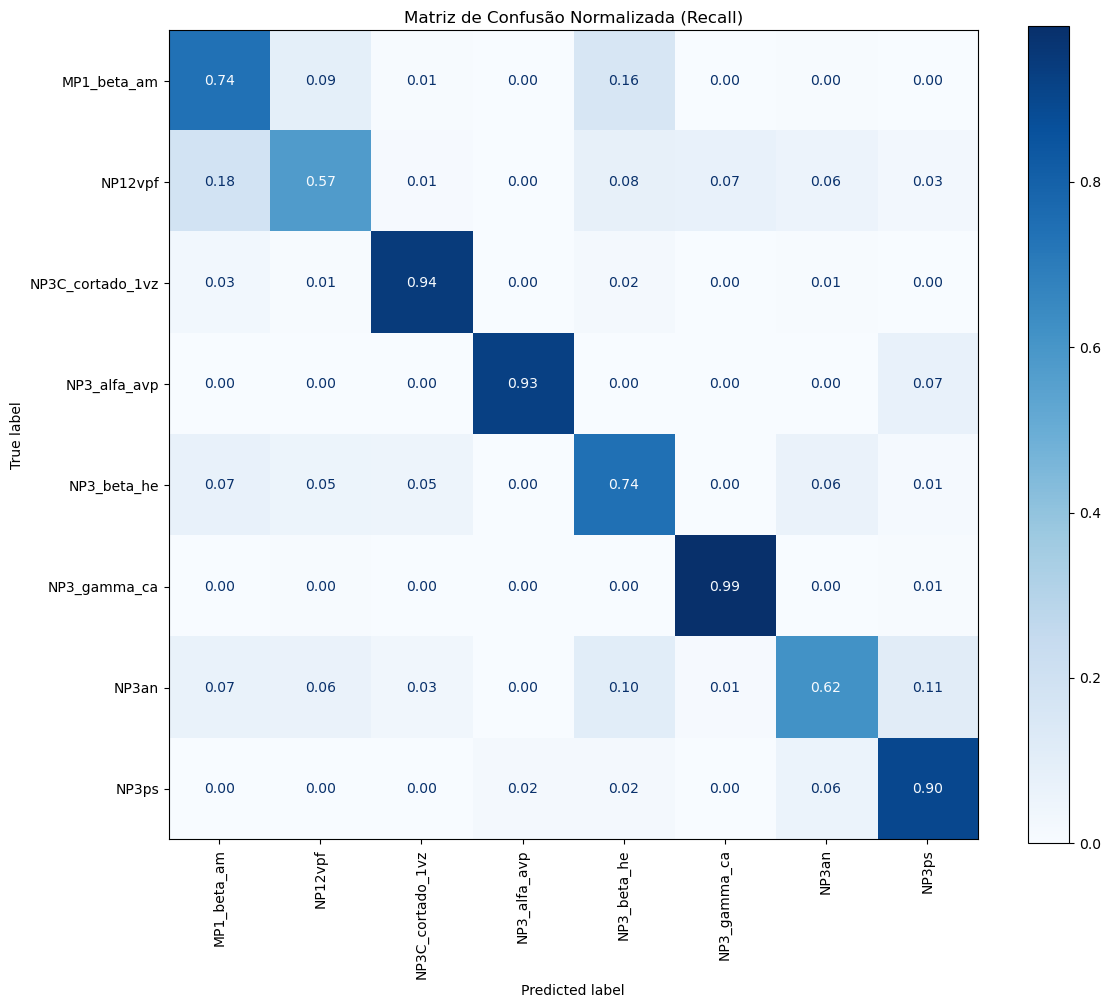

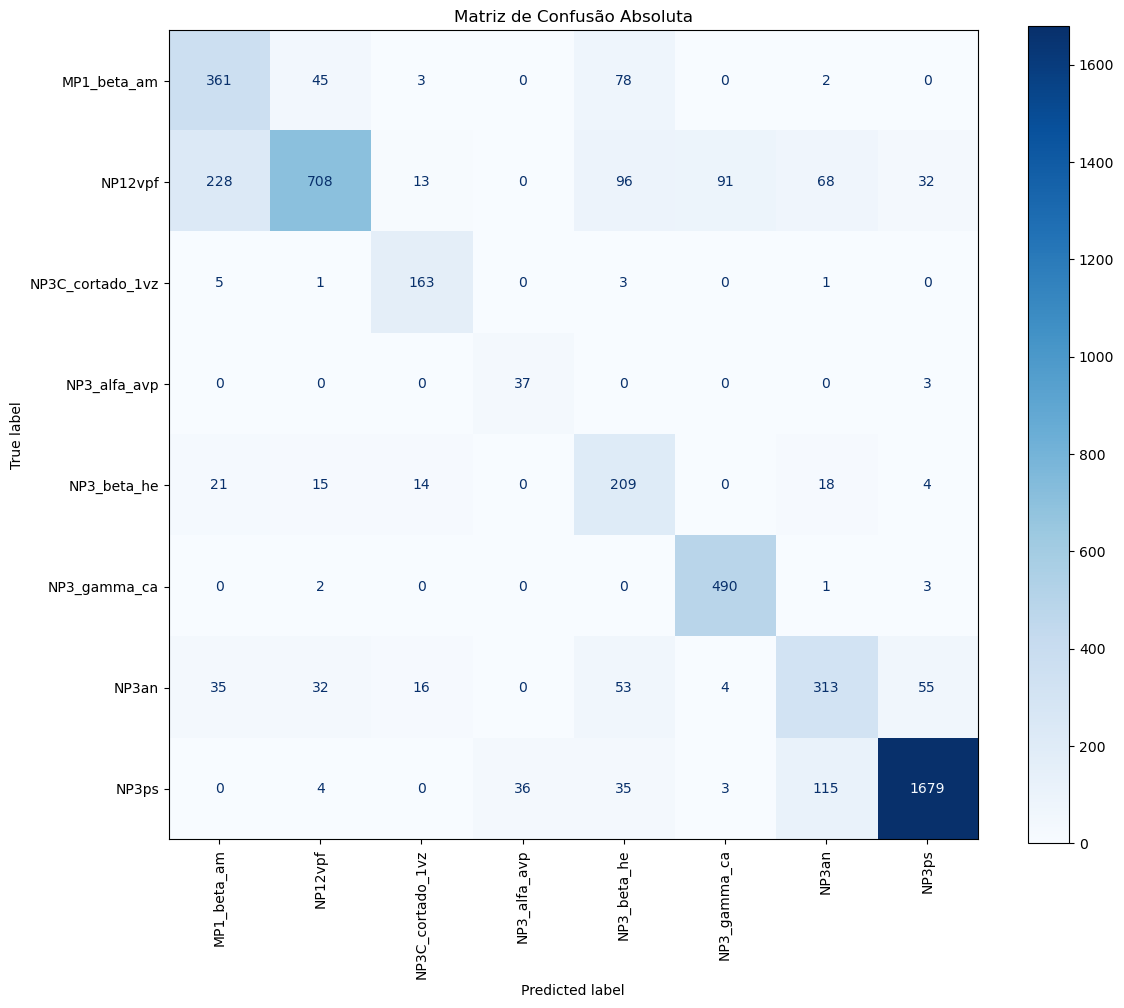

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusão normalizada por linha (recall)
fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    normalize='true',
    cmap='Blues',
    ax=ax,
    values_format='.2f',
    xticks_rotation=90
)
plt.title('Matriz de Confusão Normalizada (Recall)')
plt.tight_layout()
plt.show()

# Matriz de confusão absoluta
fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='Blues',
    ax=ax,
    values_format='d',
    xticks_rotation=90
)
plt.title('Matriz de Confusão Absoluta')
plt.tight_layout()
plt.show()

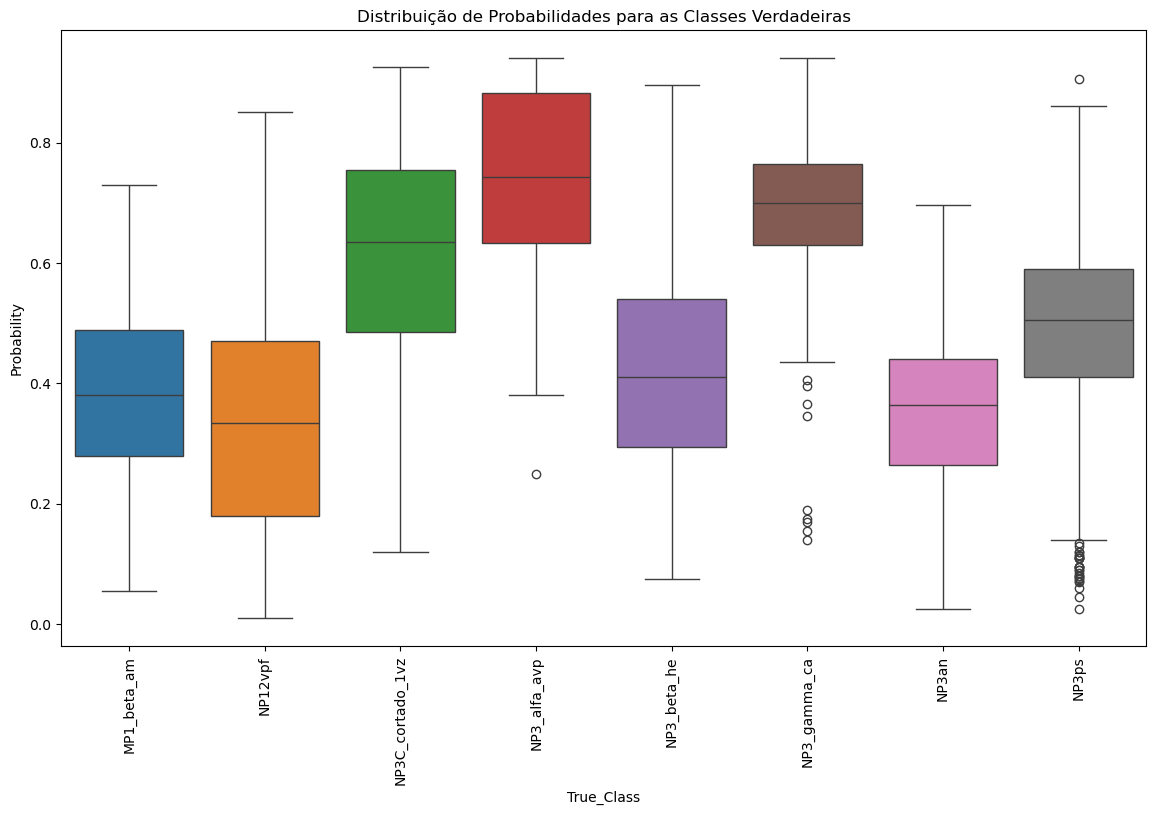

In [61]:
# DataFrame com probabilidades
prob_df = pd.DataFrame(y_proba, columns=best_rf.classes_)
prob_df['True_Class'] = y_test.reset_index(drop=True)
prob_df['Predicted_Class'] = y_pred

# Melhorar visualização
melted_probs = prob_df.melt(id_vars=['True_Class', 'Predicted_Class'], 
                           var_name='Class', 
                           value_name='Probability')

plt.figure(figsize=(14, 8))
sns.boxplot(x='True_Class', y='Probability', hue='Class', 
            data=melted_probs[melted_probs['Class'] == melted_probs['True_Class']])
plt.title('Distribuição de Probabilidades para as Classes Verdadeiras')
plt.xticks(rotation=90)
plt.legend([], [], frameon=False)
plt.show()

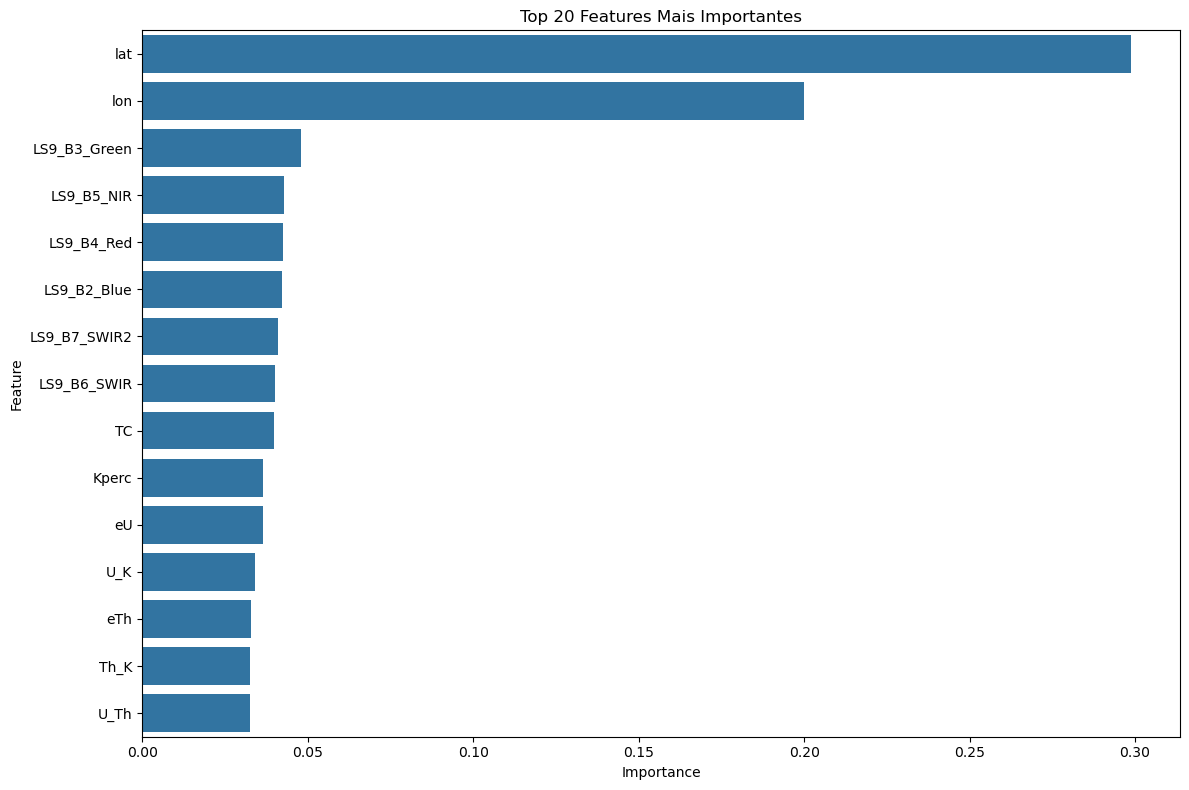

In [62]:
# Extrair importância das features
importances = best_rf.named_steps['classifier'].feature_importances_
features = X_train.columns
feature_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_imp = feature_imp.sort_values('Importance', ascending=False)

# Plotar top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(20))
plt.title('Top 20 Features Mais Importantes')
plt.tight_layout()
plt.show()

# Salvar importância para análise
feature_imp.to_csv('feature_importance.csv', index=False)

In [67]:
class_to_analyze = 'NP12vpfc'  # Substitua por uma classe com baixo desempenho

# Filtrar apenas os exemplos desta classe
class_mask = y_test == class_to_analyze
misclassified = y_pred[class_mask] != y_test[class_mask]

print(f"\nAnálise para a classe {class_to_analyze}:")
print(f"Total de amostras: {sum(class_mask)}")
print(f"Precisão: {sum((y_pred == class_to_analyze) & (y_test == class_to_analyze)) / sum(y_pred == class_to_analyze):.2f}")
print(f"Recall: {sum((y_pred == class_to_analyze) & (y_test == class_to_analyze)) / sum(class_mask):.2f}")

# Verificar para quais classes está sendo confundida
print("\nPrincipais classes de confusão:")
print(pd.Series(y_pred[class_mask & misclassified]).value_counts())



Análise para a classe NP12vpfc:
Total de amostras: 0
Precisão: nan


C:\Users\Matias\AppData\Local\Temp\ipykernel_18200\1106129838.py:9: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Precisão: {sum((y_pred == class_to_analyze) & (y_test == class_to_analyze)) / sum(y_pred == class_to_analyze):.2f}")


ZeroDivisionError: division by zero

In [68]:
# Ajuste de thresholds por classe
from sklearn.metrics import precision_recall_curve

thresholds = {}
for i, cls in enumerate(best_rf.classes_):
    precision, recall, thresh = precision_recall_curve(y_test == cls, y_proba[:, i])
    f1 = 2 * (precision * recall) / (precision + recall + 1e-9)
    optimal_idx = np.argmax(f1)
    thresholds[cls] = thresh[optimal_idx]

# Aplicar novos thresholds
y_pred_adj = np.array([best_rf.classes_[i] for i in np.argmax(
    y_proba > np.array([thresholds[cls] for cls in best_rf.classes_]), axis=1)])

print("\nRelatório com Thresholds Ajustados:\n", classification_report(y_test, y_pred_adj))


Relatório com Thresholds Ajustados:
                   precision    recall  f1-score   support

     MP1_beta_am       0.39      0.82      0.53       489
         NP12vpf       0.78      0.61      0.69      1236
NP3C_cortado_1vz       0.90      0.89      0.90       173
    NP3_alfa_avp       0.75      0.75      0.75        40
     NP3_beta_he       0.55      0.57      0.56       281
    NP3_gamma_ca       0.94      0.93      0.94       496
           NP3an       0.61      0.47      0.53       508
           NP3ps       0.96      0.87      0.91      1872

        accuracy                           0.75      5095
       macro avg       0.73      0.74      0.72      5095
    weighted avg       0.80      0.75      0.76      5095

